In [1]:

import pandas as pd              
import numpy as np               
import matplotlib                
from matplotlib import pyplot as plt
import seaborn as sns            
import sklearn                  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import scipy                     
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
import collections
import zipfile
import requests
import platform
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import yellowbrick as yb
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import datetime
from time import time
from sklearn.neural_network import MLPClassifier

In [2]:
def getData(file_name, features, target):
    
    data = pd.read_csv(file_name)
    data.head()
    #sns.heatmap(data.corr(), annot=True)
    #data[target].value_counts().plot(kind='bar')
    return data[features], data[target]

In [3]:
def plot_nn(title,ylabel,base,pca,ica,rp,rf):
    hidden_layers = [2, 4, 6, 8, 10, 12,14, 16, 18, 20]
    plt.grid(True)
    plt.title(title)
    plt.xlabel('Hidden Layers')
    plt.ylabel(ylabel)

    plt.plot(hidden_layers, pca, color='green',label='PCA', marker='o')
    plt.plot(hidden_layers, ica, color='blue',label='ICA', marker='o')
    plt.plot(hidden_layers, rp, color='red',label='RP', marker='o')
    plt.plot(hidden_layers, rf, color='purple',label='RF', marker='o')
    plt.plot(hidden_layers, base, color='black',label='Base', marker='o')
    plt.legend()
    plt.show()

In [4]:
def plot_bar(data):
    labels_pred = pd.DataFrame(data = data, columns=['label'])
    labels_pred['label'].value_counts().plot('bar')
    

In [5]:
def plot_nn_newf(title,ylabel,base,kmeans,em):
    hidden_layers = [2, 4, 6, 8, 10, 12,14, 16, 18, 20]
    plt.grid(True)
    plt.title(title)
    plt.xlabel('Hidden Layers')
    plt.ylabel(ylabel)
    plt.plot(hidden_layers, kmeans, color='blue',label='Kmeans', marker='o')
    plt.plot(hidden_layers, em, color='red',label='EM', marker='o')
    plt.plot(hidden_layers, base, color='black',label='Base', marker='o')
    plt.legend()
    plt.show()

In [6]:
def kmeans(X,name):
    '''
    sse = {}
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=234).fit(X)
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.title("K-Means ({})".format(name))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()
    '''
    kmeans = KMeans(random_state=234)
    kelbow_visualizer(kmeans, X, k=10)
    
    for k in range(2, 10):
        model = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=234))
        model.fit(X)
        model.show()

In [7]:
def kmeans_bar(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
    kmeans_labels.value_counts().plot(kind='bar')




In [8]:
def kmeans_pca_2d(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
   
    pc_df = pd.DataFrame(data = X , 
        columns = ['PC1', 'PC2'])
    pc_df['Cluster'] = kmeans_labels
    sns.lmplot( x="PC1", y="PC2",
          data=pc_df, 
          fit_reg=False, 
          hue='Cluster', # color by cluster
          legend=True,
          scatter_kws={"s": 8}) # specify the point size


In [9]:
def kmeans_pca_3d(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
   
    pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2', 'PC3'])
    Xax = pc_df[:,0]
    Yax = pc_df[:,1]
    Zax = pc_df[:,2]

    cdict = {0:'red',1:'green'}
    labl = {0:'Malignant',1:'Benign'}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')

    fig.patch.set_facecolor('white')
    for l in np.unique(kmeans_labels):
     ix=np.where(kmeans_labels==l)
     ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
               label=labl[l], marker=marker[l], alpha=alpha[l])
    # for loop ends
    ax.set_xlabel("First Principal Component", fontsize=14)
    ax.set_ylabel("Second Principal Component", fontsize=14)
    ax.set_zlabel("Third Principal Component", fontsize=14)

    ax.legend()
    plt.show()

In [10]:
def kmeans_pca_3d(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
   
    pc_df = pd.DataFrame(data = X , 
        columns = ['PC1', 'PC2'])
    sns.pairplot(df_iris, hue='species')

In [11]:
def gm_bar(X, cluster):
    gm = GaussianMixture(n_components=cluster, covariance_type='full')
    gm.fit(X)
    gm.predict(X)
    gm_labels = pd.DataFrame(data = gm.predict(X), columns=['gm'])
    gm_labels.value_counts().plot(kind='bar')

In [12]:
def em(X,name):
    
    # Set up a range of cluster numbers to try
    n_range = range(2,15)

    # Create empty lists to store the BIC and AIC values
    bic_score = []
    aic_score = []

    # Loop through the range and fit a model
    for n in n_range:
        gm = GaussianMixture(n_components=n, 
                             random_state=123, 
                             n_init=10)
        gm.fit(X)

        # Append the BIC and AIC to the respective lists
        bic_score.append(gm.bic(X))
        aic_score.append(gm.aic(X))

    plt.plot(n_range, bic_score, '-o',label='BIC', color='orange')
    plt.plot(n_range, aic_score, '-o',label='AIC', color='green')
    plt.ylabel('Score')
    plt.xlabel('Number of Clusters')
    plt.title('BIC and AIC Scores Per Number Of Clusters ({})'.format(name))
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [13]:
def pcaTest(X,name):
    pca = PCA(n_components=X.shape[1], random_state=42)
    pca.fit(X)
    pca_var_ratio = np.cumsum(pca.explained_variance_ratio_ * 100)
    print(pca_var_ratio)
    plt.plot(pca_var_ratio)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')
    plt.title('Normalized Mean Kurtosis Value vs. Components {}'.format(name))
    plt.grid(True)
    plt.show()

In [14]:
def icaTest(X,name):
    kurtosis_values = []
    for i in range(1,X.shape[1]):
        X_ICA = FastICA(n_components = i,max_iter=1000).fit_transform(X)
        kur = scipy.stats.kurtosis(X_ICA)
        kurtosis_values.append(np.mean(kur)/i)
    kurtosis_values = np.array(kurtosis_values)
    print (np.argmax(kurtosis_values)+1)
    plt.plot(np.arange(1,X.shape[1]),kurtosis_values)
    plt.xlabel('Components')
    plt.ylabel('Mean Kurtosis Value')
    plt.title('Mean Kurtosis Value vs. Components {}'.format(name))
    plt.grid(True)
    plt.show()

In [15]:
def rp(X,name):
    reconstruction_error = []

    for i in range(1, X.shape[1]+1):
        rp = GaussianRandomProjection(n_components = i, random_state=234)
        rp.fit(X)
        trans = rp.transform(X)
        pinv = np.linalg.pinv(np.transpose(rp.components_))
        X_recons = np.dot(trans, pinv)
        X_recons = pd.DataFrame(data=X_recons, columns=X.columns)
        rmse = np.sqrt(mean_squared_error(X, X_recons))
        reconstruction_error.append(rmse/100)

    print(reconstruction_error)
    plt.plot(range(1, X.shape[1]+1),reconstruction_error,marker='o')
    plt.title("RP")
    plt.xlabel('Number of components')
    plt.ylabel('Reconstruction error (RMSE)')   
    plt.grid(True)
    plt.show()



In [16]:
def lda(X,Y,name):
    lda = LinearDiscriminantAnalysis(solver= 'eigen')
    lda.fit(X, Y.values.ravel())
    lda_var_ratio = np.cumsum(lda.explained_variance_ratio_ * 100)
    print(lda_var_ratio)
    fig = plt.figure()
    plt.plot(lda_var_ratio)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')
    plt.grid(True)
    plt.show()

In [17]:
def NN(X_train, X_test, y_train, y_test):
    hidden_layer_sizes = [2, 4, 6, 8, 10, 12,14, 16, 18, 20]
    train_score = []
    test_score = []
    train_time = []
    test_time = []
    for i in hidden_layer_sizes:
        mlp_model = MLPClassifier(hidden_layer_sizes=(i,),random_state=234,max_iter=5000)
        
        start_time = time() * 1000
        mlp_model.fit(X=X_train, y=y_train)
        end_time = time() * 1000
        print ("Training Time:",end_time-start_time) 
        train_time.append(end_time-start_time)
        
        y_train_predict = mlp_model.predict(X_train)
        train_accuracy = f1_score(y_train, y_train_predict,average='macro')
        train_score.append(train_accuracy)
        
        start_time = time() * 1000
        y_val_test_predict = mlp_model.predict(X_test)
        test_accuracy = f1_score(y_test, y_val_test_predict,average='macro')
        end_time = time() * 1000
        print ("Testing Time:",end_time-start_time) 
        test_time.append(end_time-start_time)
        test_score.append(test_accuracy)
    return train_score, test_score, train_time, test_time


Wine tests 

In [18]:
def wine():
    features = ['fixed_acidity','volatile_acidity','citric_acid',
                'residual_sugar','chlorides','free_sulfur_dioxide',
                'total_sulfur_dioxide','density','pH','sulphates','alcohol']
    target = ['quality']
    file_name = "./white_wine_updated.csv"
    data_name = "wine"
    X, Y = getData(file_name, features, target)
    return X,Y,data_name
    '''
    print (X.shape)
    print ("Kmeans")
    kmeans(X,data_name)
    print ("EM")
    em(X,data_name)
    print("RM")
    rp(X,data_name)
    print("LDA")
    lda(X,Y,data_name)
    '''

In [19]:
def divorce():
    features = ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9', 'Atr10', 'Atr11', 'Atr12',
                'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23',
                'Atr24', 'Atr25', 'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33', 'Atr34',
                'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41', 'Atr42', 'Atr43', 'Atr44', 'Atr45',
                'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54']
    target = ['Class']
    file_name = "./divorce_updated.csv"
    data_name = "divorce"
    X, Y = getData(file_name, features, target)
    return X,Y,data_name
    print (X.shape)

    kmeans(X,data_name)
    em(X,data_name)

In [20]:
X,Y,data_name = wine()

<AxesSubplot:xlabel='quality'>

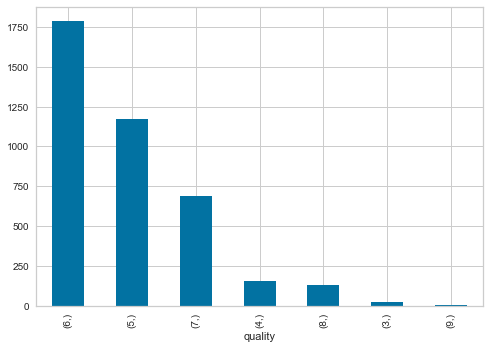

In [21]:
Y.value_counts().plot(kind='bar')

<AxesSubplot:>

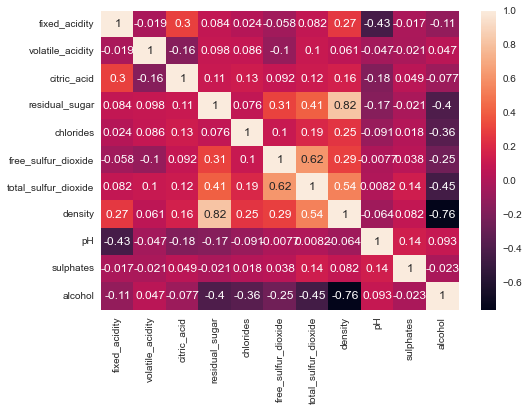

In [22]:
sns.heatmap(X.corr(), annot=True)

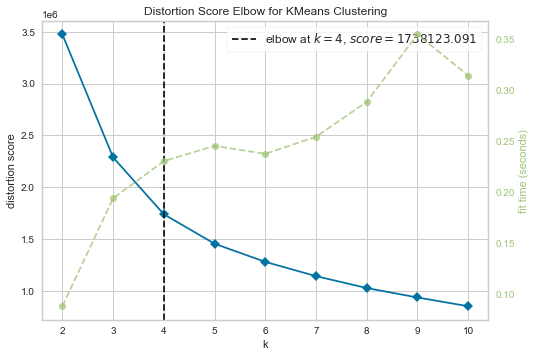

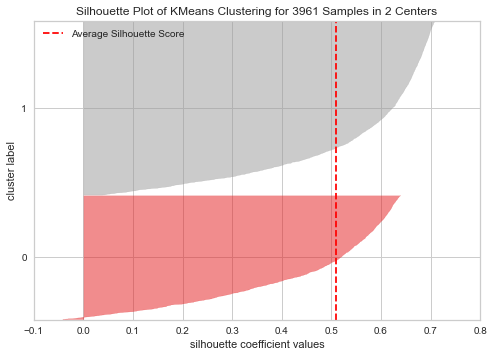

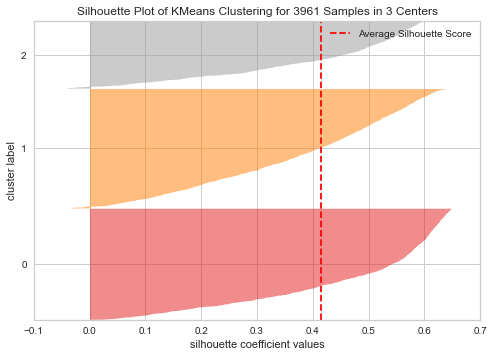

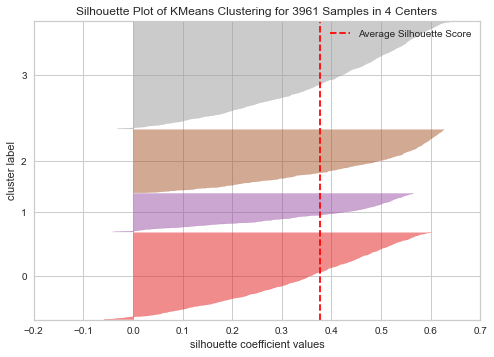

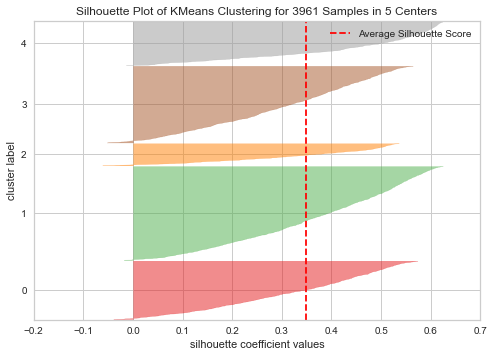

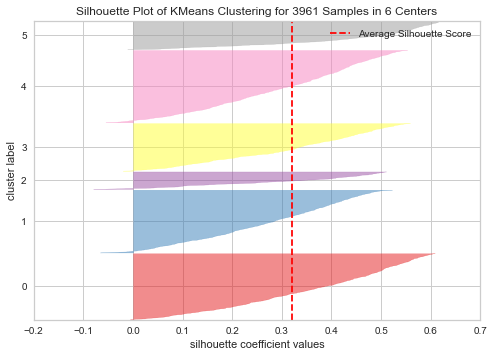

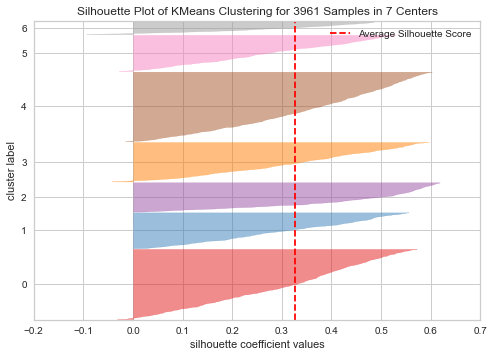

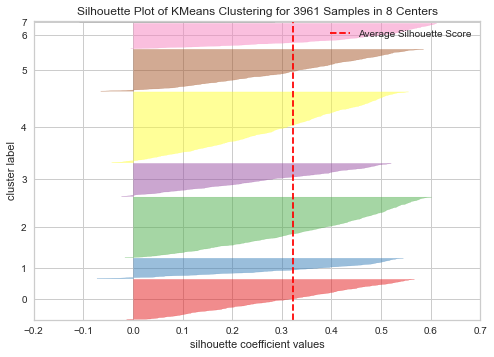

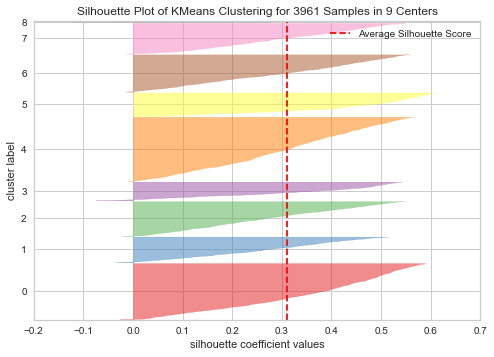

In [23]:
kmeans(X,data_name)

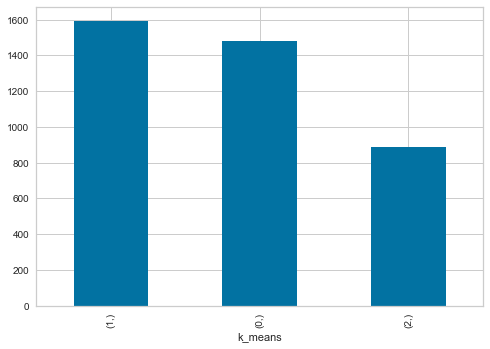

In [24]:
kmeans_bar(X, 3)

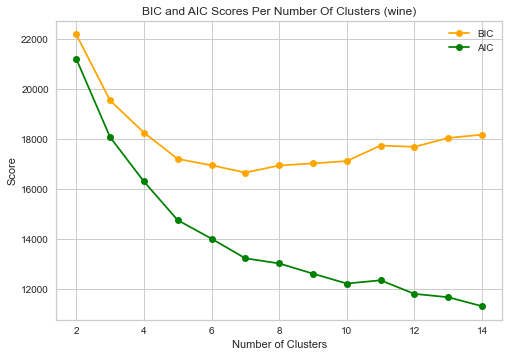

In [25]:
em(X,data_name)

In [26]:
gm_bar(X, 7)

dimension reduction

[ 91.17509556  99.01504616  99.9137241   99.96428936  99.99752614
  99.99837906  99.99904792  99.99957987  99.99997978  99.99999998
 100.        ]


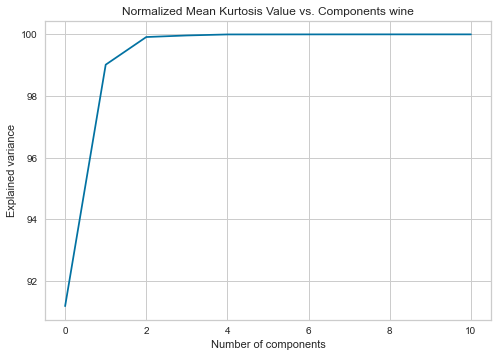

In [27]:
pcaTest(X,data_name)

2


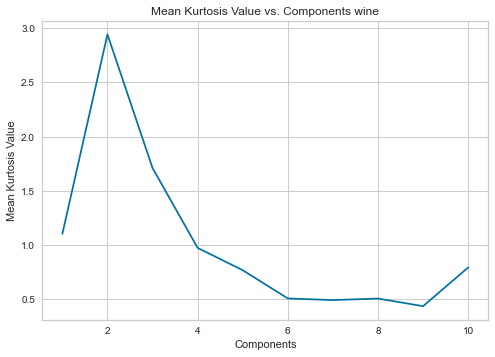

In [28]:
icaTest(X,data_name)

[0.41206512648657834, 0.4100411833495305, 0.4046027224215802, 0.2672228733922739, 0.26251813996104384, 0.2622573259798684, 0.247743307497256, 0.19806670746199517, 0.16927197993505128, 0.039720586161147514, 2.164816213930005e-15]


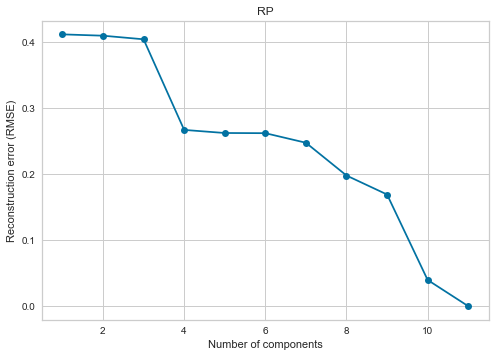

In [29]:
rp(X,data_name)

[ 82.26732415  94.53334856  97.8773435   99.25165972  99.64980883
 100.        ]


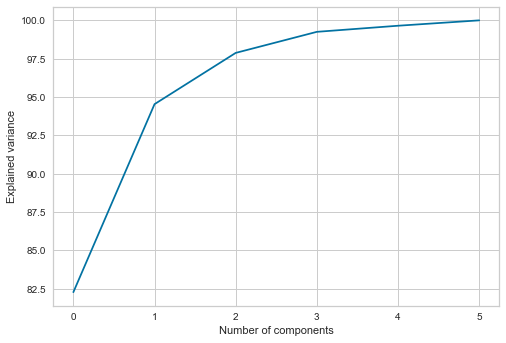

In [30]:
lda(X,Y,data_name)

In [31]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, Y, test_size=0.2, random_state=234)

In [32]:
X_PCA = PCA(n_components = 2).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, Y, test_size=0.2, random_state=234)

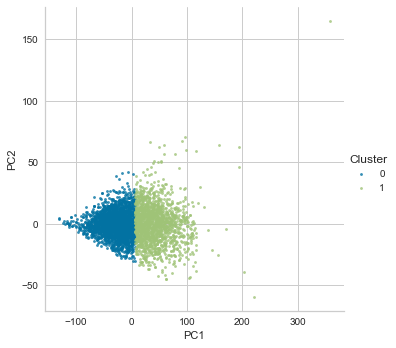

In [33]:
kmeans_pca_2d(X_PCA, 2)

In [34]:
X_ICA = FastICA(n_components = 2).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, Y, test_size=0.2, random_state=234)

In [35]:
X_RP = GaussianRandomProjection(n_components = 4).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, Y, test_size=0.2, random_state=234)

In [36]:
X_LDP = LinearDiscriminantAnalysis(n_components = 2 ,solver= 'eigen').fit_transform(X,Y.values.ravel())
X_LDP_train, X_LDP_test, y_LDP_train, y_LDP_test = train_test_split(X_LDP, Y, test_size=0.2, random_state=234)

In [37]:
X_PCA

array([[ 34.96744354,   1.31990976],
       [-10.67095068, -18.84618484],
       [-39.96912331,   5.86219393],
       ...,
       [-26.7292516 ,   2.10584059],
       [-30.36418654,  -7.24738328],
       [-41.40591853,  -2.17503076]])

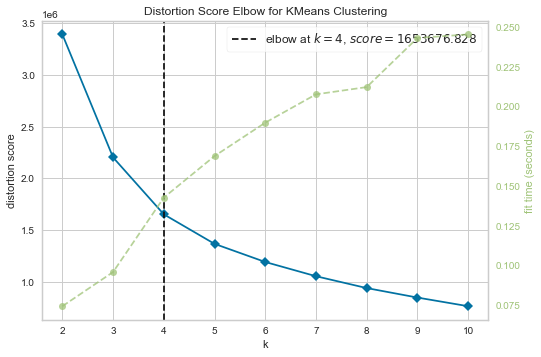

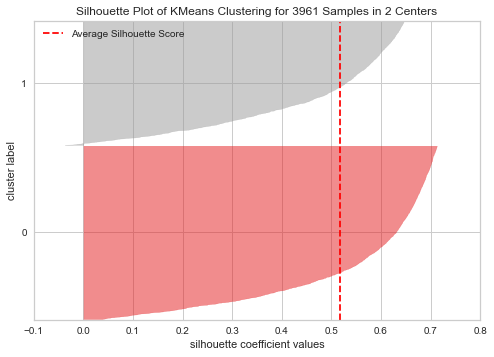

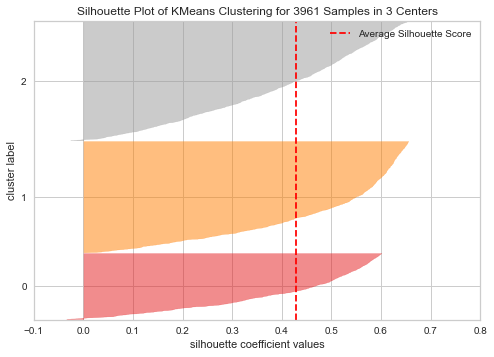

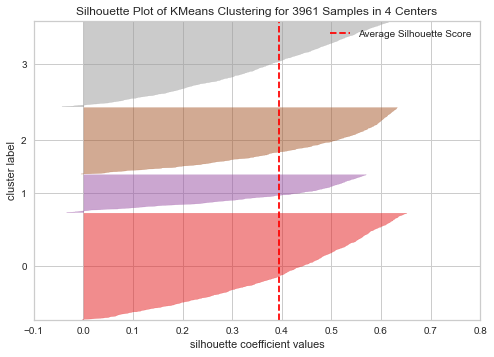

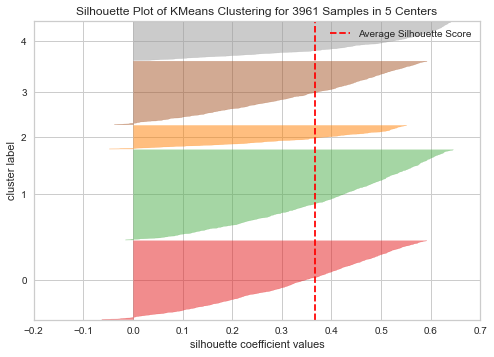

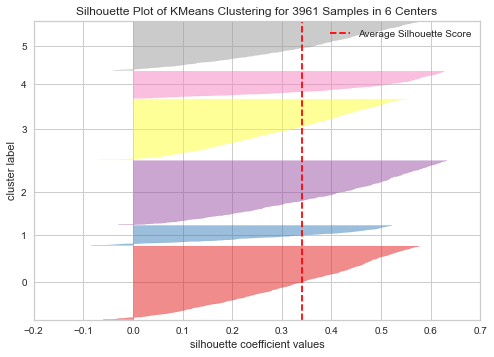

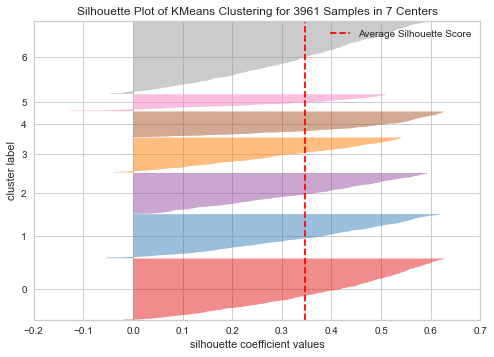

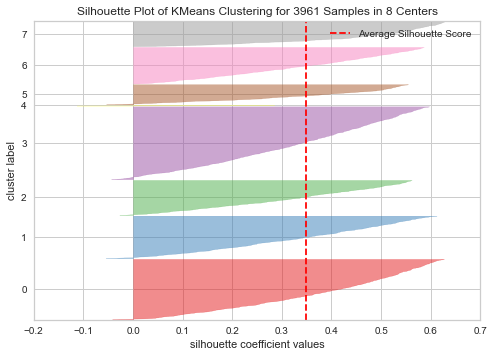

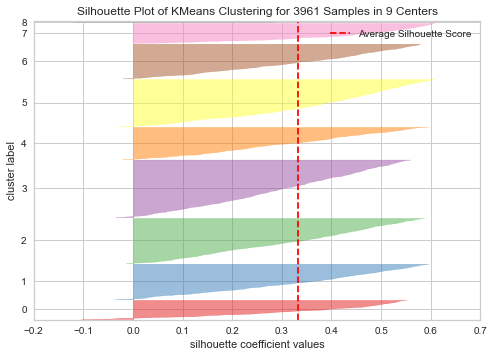

In [38]:
kmeans(X_PCA,data_name)

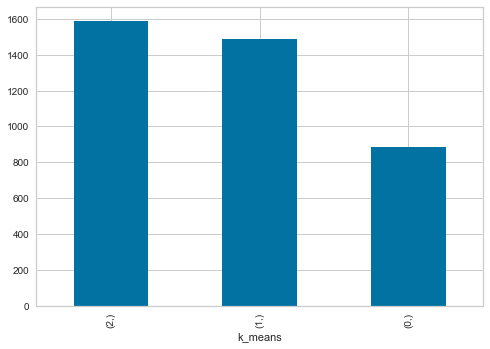

In [39]:
kmeans_bar(X_PCA, 3)

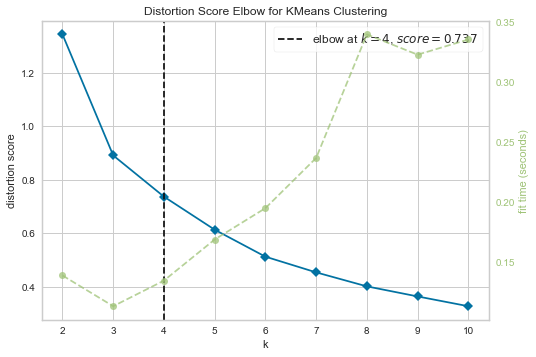

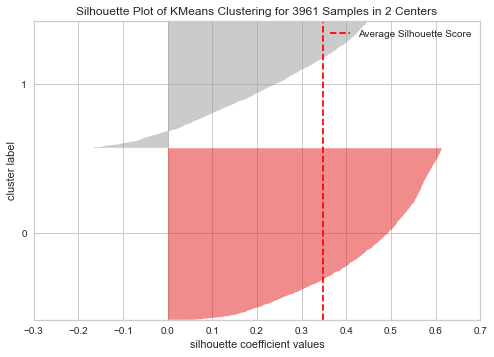

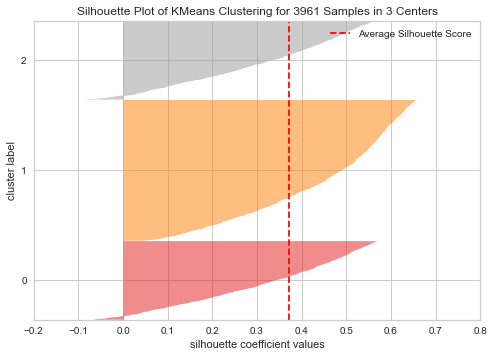

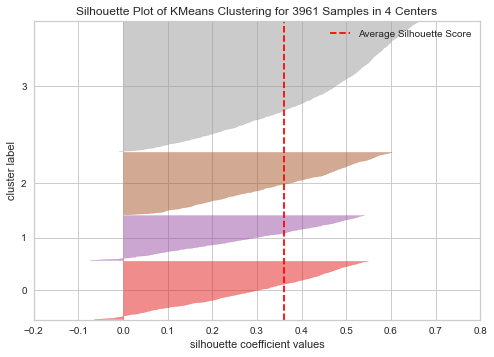

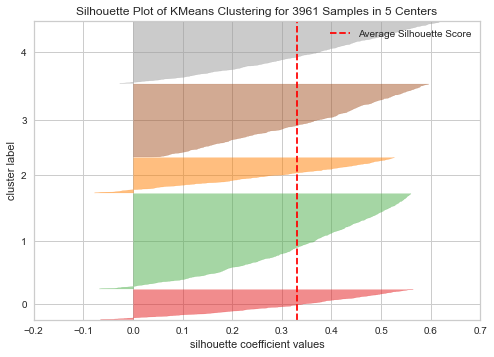

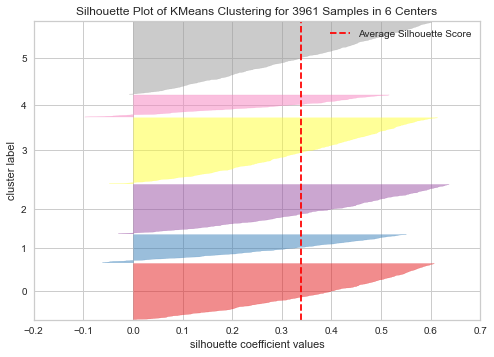

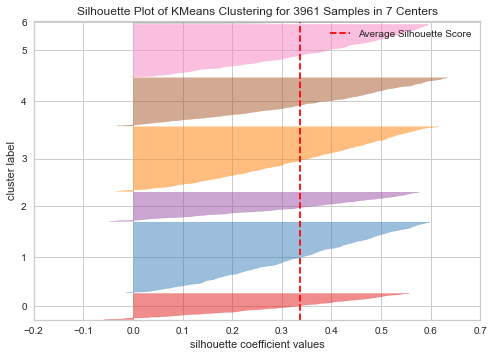

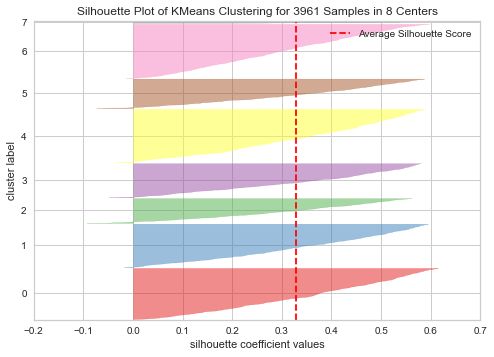

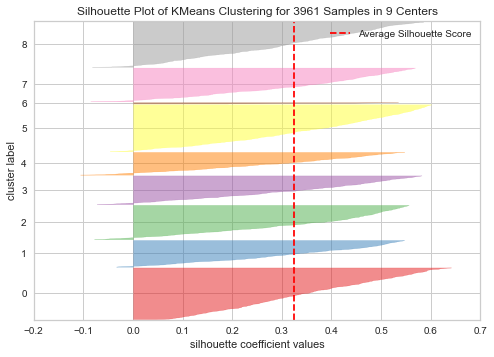

In [40]:
kmeans(X_ICA,data_name)

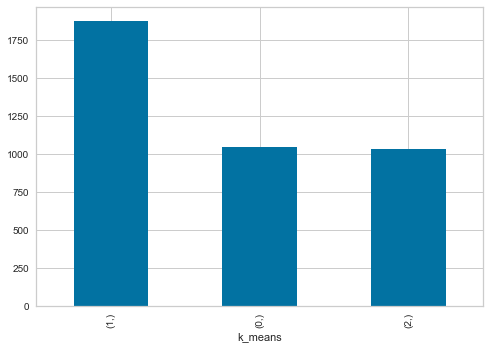

In [41]:
kmeans_bar(X_ICA, 3)

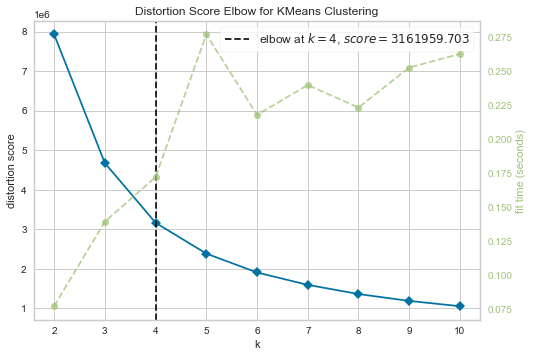

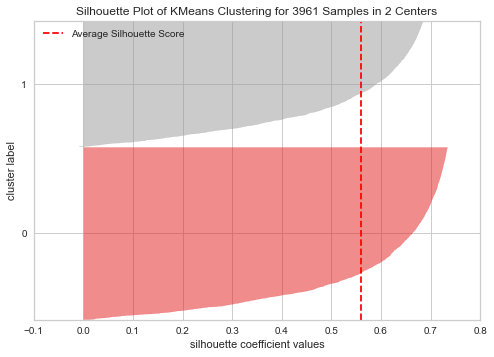

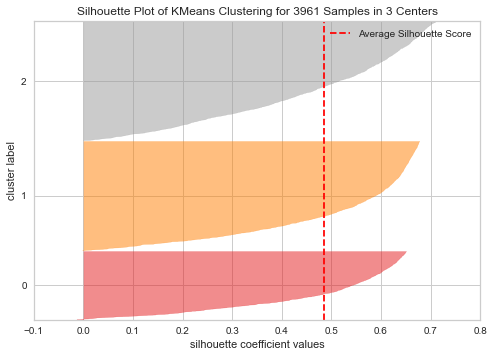

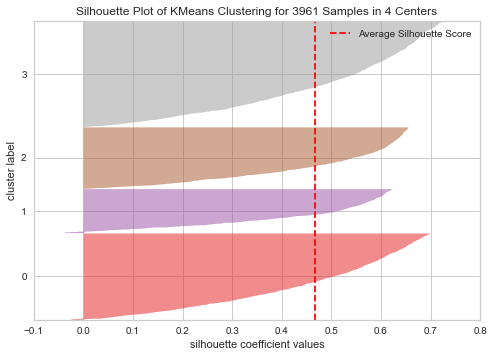

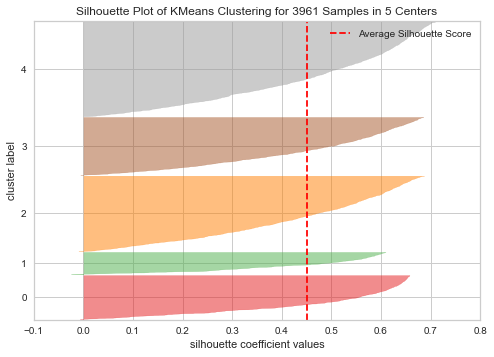

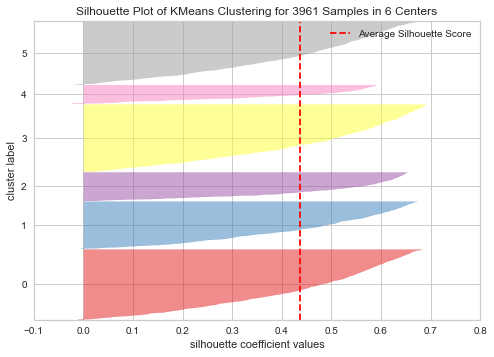

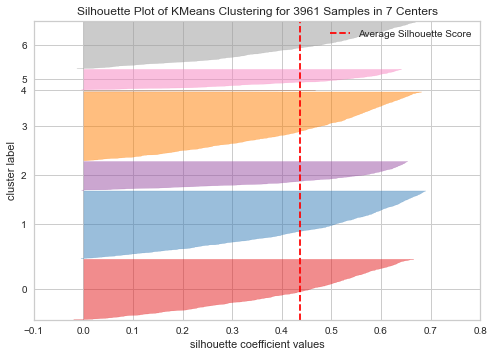

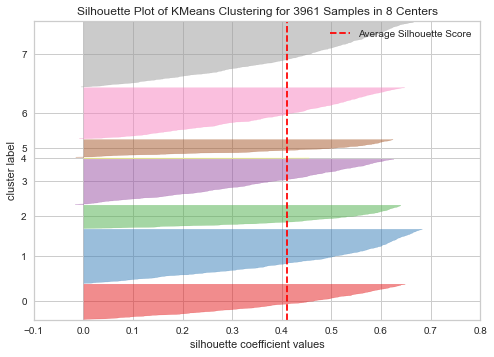

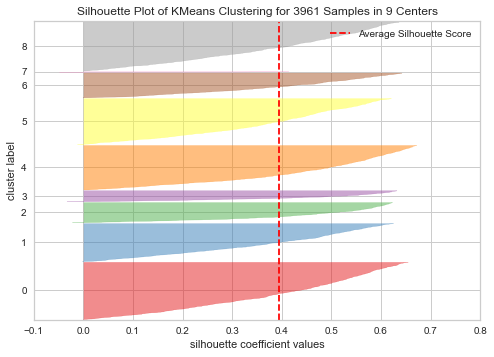

In [42]:
kmeans(X_RP,data_name)

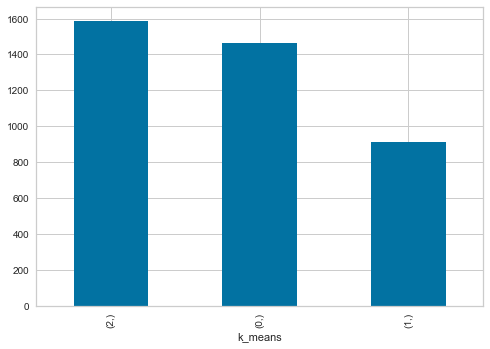

In [43]:
kmeans_bar(X_RP, 3)

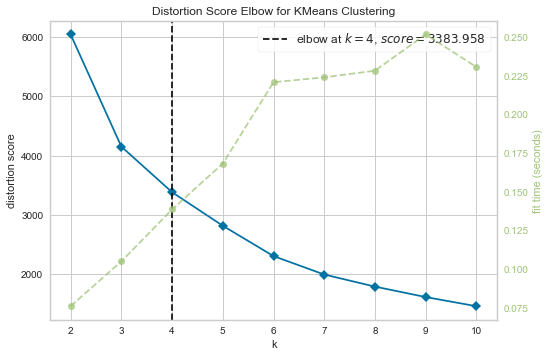

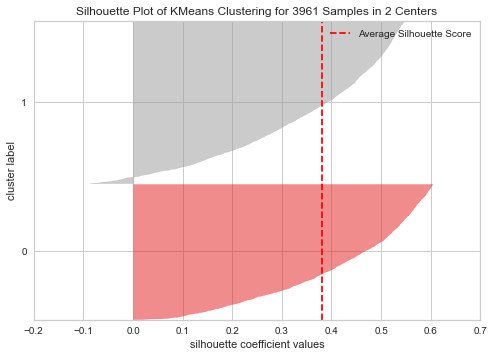

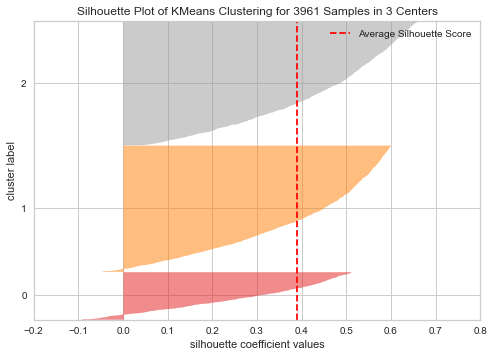

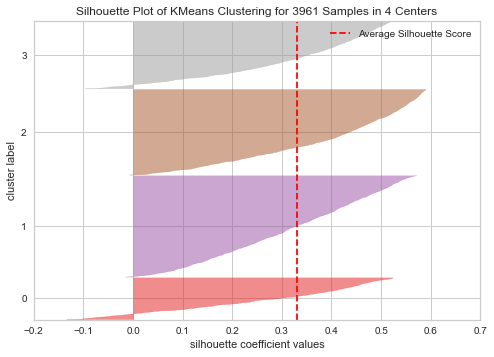

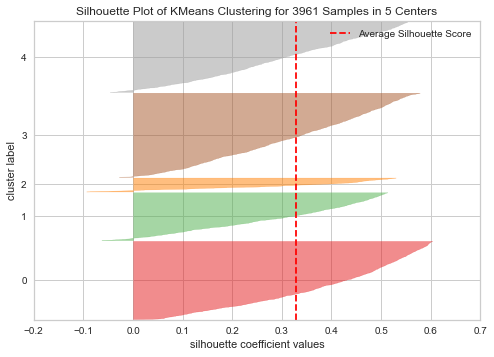

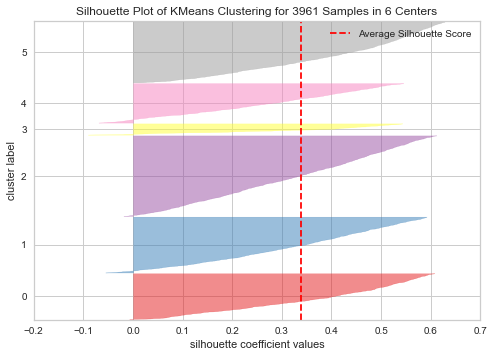

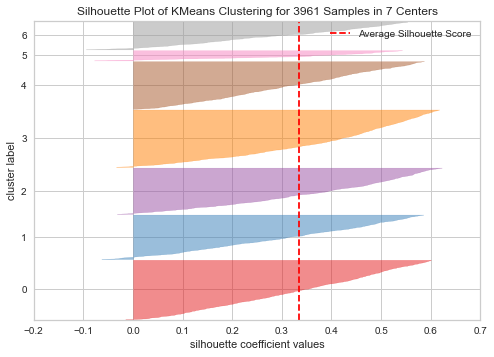

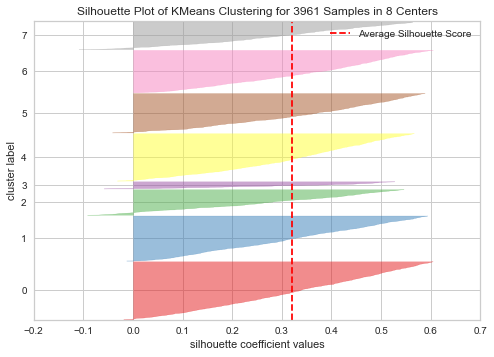

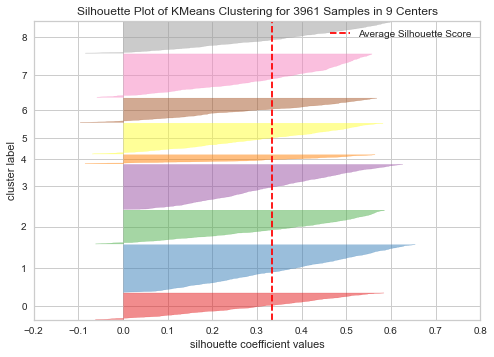

In [44]:
kmeans(X_LDP,data_name)

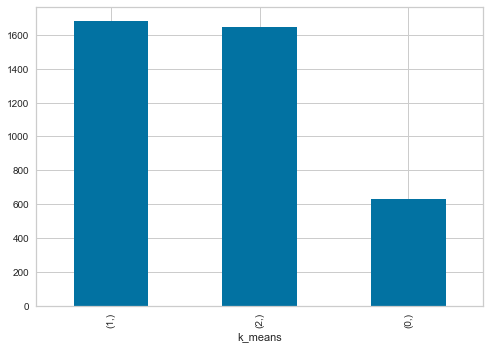

In [45]:
kmeans_bar(X_LDP, 3)

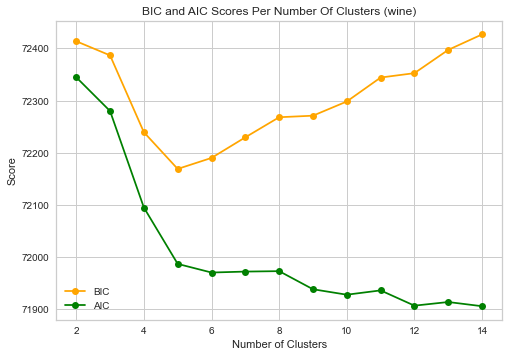

In [46]:
em(X_PCA,data_name)

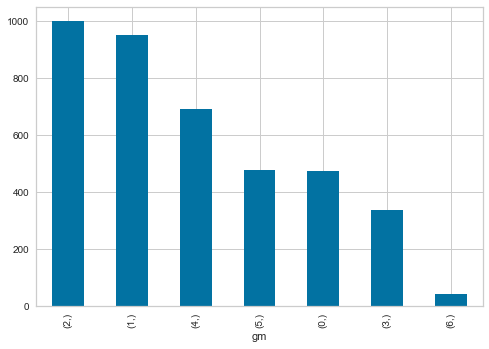

In [47]:
gm_bar(X_PCA, 7)

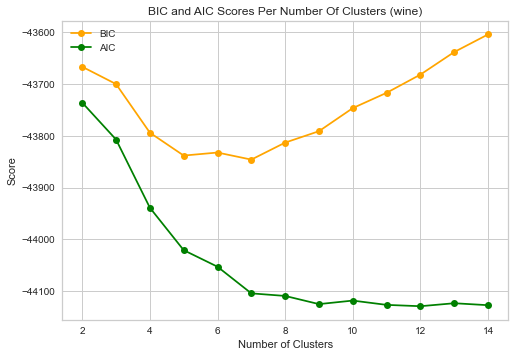

In [48]:
em(X_ICA,data_name)

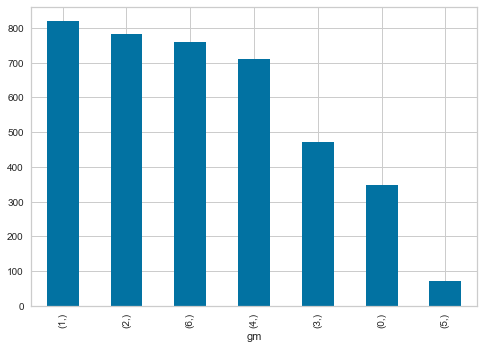

In [49]:
gm_bar(X_ICA, 7)

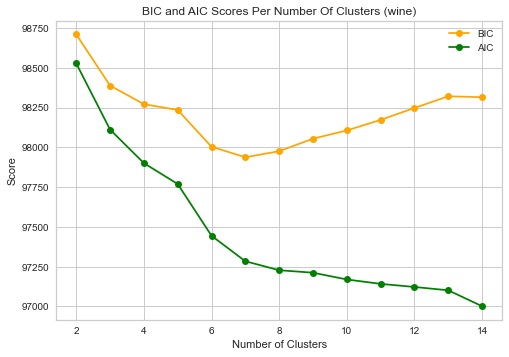

In [50]:
em(X_RP,data_name)

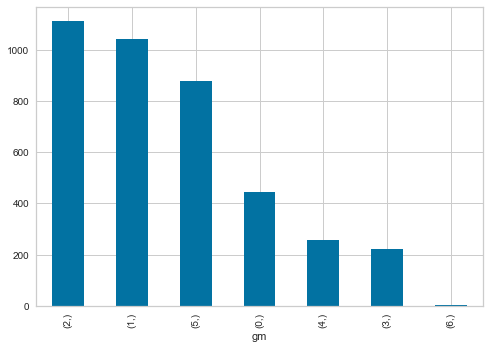

In [51]:
gm_bar(X_RP, 7)

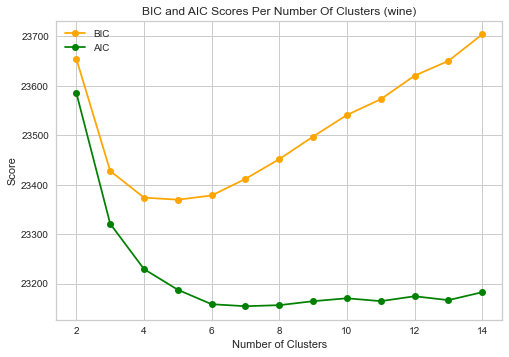

In [52]:
em(X_LDP,data_name)

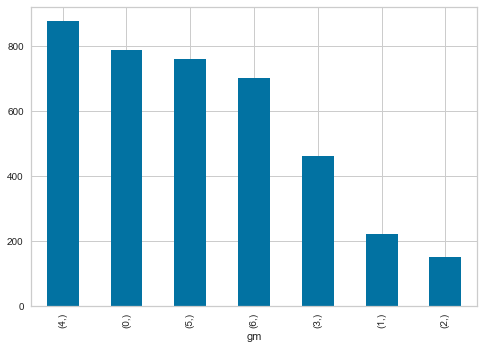

In [53]:
gm_bar(X_LDP, 7)

NN

In [54]:
base_train_score, base_test_score, base_train_time, base_test_time = NN(X_base_train, X_base_test, y_base_train.values.ravel(), y_base_test.values.ravel())

Training Time: 1907.148681640625
Testing Time: 2.35595703125
Training Time: 1234.130859375
Testing Time: 2.258056640625
Training Time: 2577.694091796875
Testing Time: 2.083984375
Training Time: 2279.77880859375
Testing Time: 2.362060546875
Training Time: 1385.11669921875
Testing Time: 2.126953125
Training Time: 1801.068115234375
Testing Time: 2.02685546875
Training Time: 984.09375
Testing Time: 2.132080078125
Training Time: 1201.291259765625
Testing Time: 2.018798828125
Training Time: 1238.055908203125
Testing Time: 2.135009765625
Training Time: 1427.524169921875
Testing Time: 2.05810546875


In [55]:
pca_train_score, pca_test_score, pca_train_time, pca_test_time = NN(X_PCA_train, X_PCA_test, y_PCA_train.values.ravel(), y_PCA_test.values.ravel())

Training Time: 1539.403076171875
Testing Time: 0.830810546875
Training Time: 1477.923828125
Testing Time: 0.8623046875
Training Time: 1870.10009765625
Testing Time: 1.788818359375
Training Time: 1384.69189453125
Testing Time: 1.09716796875
Training Time: 1568.73828125
Testing Time: 0.884033203125
Training Time: 1538.929931640625
Testing Time: 0.98095703125
Training Time: 1565.148681640625
Testing Time: 0.985107421875
Training Time: 1541.4453125
Testing Time: 1.6357421875
Training Time: 854.99169921875
Testing Time: 1.124755859375
Training Time: 1039.492919921875
Testing Time: 0.9951171875


In [56]:
ica_train_score, ica_test_score, ica_train_time, ica_test_time = NN(X_ICA_train, X_ICA_test, y_ICA_train.values.ravel(), y_ICA_test.values.ravel())

Training Time: 601.52197265625
Testing Time: 0.844970703125
Training Time: 1724.935791015625
Testing Time: 0.93310546875
Training Time: 2799.18115234375
Testing Time: 0.88134765625
Training Time: 2245.283203125
Testing Time: 0.938720703125
Training Time: 2651.0888671875
Testing Time: 0.999267578125
Training Time: 2484.441650390625
Testing Time: 0.967529296875
Training Time: 2209.908203125
Testing Time: 0.9619140625
Training Time: 2807.8271484375
Testing Time: 1.112060546875
Training Time: 2935.80419921875
Testing Time: 1.44384765625
Training Time: 2019.696044921875
Testing Time: 1.005126953125


In [57]:
rp_train_score, rp_test_score, rp_train_time, rp_test_time = NN(X_RP_train, X_RP_test, y_RP_train.values.ravel(), y_RP_test.values.ravel())

Training Time: 1745.724853515625
Testing Time: 0.83984375
Training Time: 1782.115234375
Testing Time: 1.010986328125
Training Time: 3503.5791015625
Testing Time: 0.805908203125
Training Time: 1057.81494140625
Testing Time: 0.849365234375
Training Time: 754.400146484375
Testing Time: 0.85302734375
Training Time: 786.671875
Testing Time: 1.136962890625
Training Time: 1735.333984375
Testing Time: 1.15283203125
Training Time: 506.141845703125
Testing Time: 1.35693359375
Training Time: 329.217041015625
Testing Time: 1.1796875
Training Time: 670.38916015625
Testing Time: 1.046875


In [58]:
ldp_train_score, ldp_test_score, ldp_train_time, ldp_test_time = NN(X_LDP_train, X_LDP_test, y_LDP_train.values.ravel(), y_LDP_test.values.ravel())

Training Time: 251.06005859375
Testing Time: 0.862060546875
Training Time: 241.1279296875
Testing Time: 1.052001953125
Training Time: 171.97021484375
Testing Time: 0.993408203125
Training Time: 362.7119140625
Testing Time: 1.60009765625
Training Time: 331.906005859375
Testing Time: 1.359130859375
Training Time: 414.778076171875
Testing Time: 0.971923828125
Training Time: 226.52490234375
Testing Time: 1.260009765625
Training Time: 273.81005859375
Testing Time: 1.193359375
Training Time: 295.72119140625
Testing Time: 1.11181640625
Training Time: 199.6259765625
Testing Time: 1.02587890625


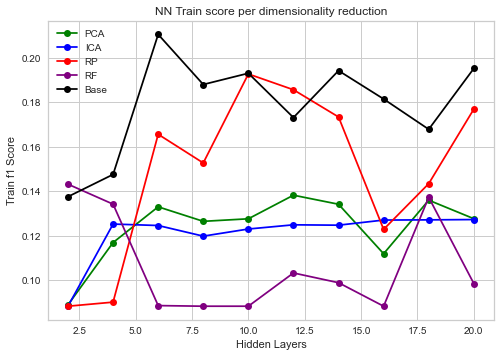

In [59]:
plot_nn("NN Train score per dimensionality reduction","Train f1 Score",base_train_score,pca_train_score,ica_train_score,rp_train_score,ldp_train_score)

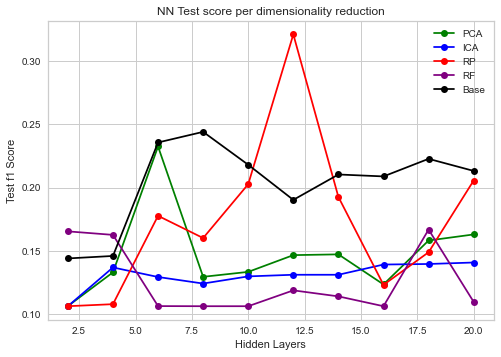

In [60]:
plot_nn("NN Test score per dimensionality reduction","Test f1 Score",base_test_score,pca_test_score,ica_test_score,rp_test_score,ldp_test_score)

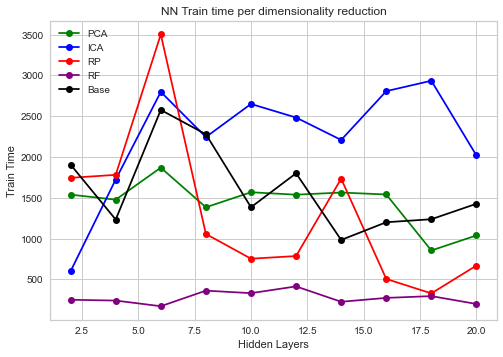

In [61]:
plot_nn("NN Train time per dimensionality reduction","Train Time",base_train_time,pca_train_time,ica_train_time,rp_train_time,ldp_train_time)

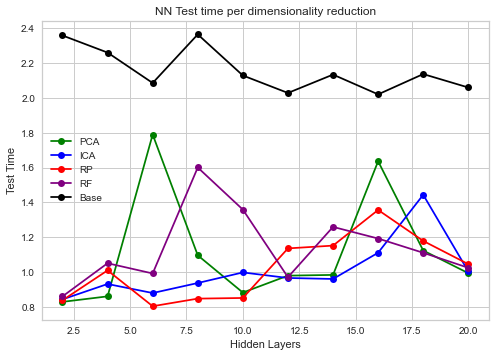

In [62]:
plot_nn("NN Test time per dimensionality reduction","Test Time",base_test_time,pca_test_time,ica_test_time,rp_test_time,ldp_test_time)

Add clusters as new feature

In [63]:
k_means_clustering = KMeans(n_clusters=3, random_state=234).fit(X)

In [64]:
k_means_clustering.predict(X)
kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])

<AxesSubplot:xlabel='k_means'>

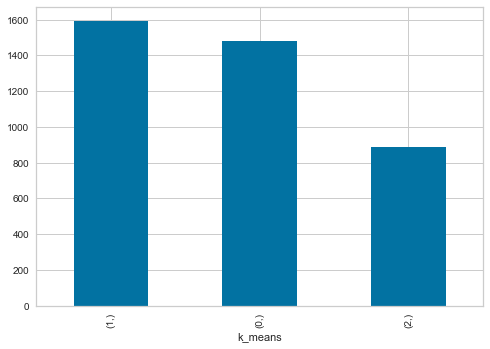

In [65]:
kmeans_labels.value_counts().plot(kind='bar')

In [66]:
X_KMeans = np.append(X, kmeans_labels, axis=1)
X_KMeans_train, X_KMeans_test, y_KMeans_train, y_KMeans_test = train_test_split(X_KMeans, Y, test_size=0.2, random_state=42)

In [67]:
kmeans_train_score, kmeans_test_score, kmeans_train_time, kmeans_test_time = NN(X_KMeans_train, X_KMeans_test, y_KMeans_train.values.ravel(), y_KMeans_test.values.ravel())

Training Time: 4551.51513671875
Testing Time: 0.914794921875
Training Time: 2783.7900390625
Testing Time: 1.049560546875
Training Time: 1320.994140625
Testing Time: 0.89990234375
Training Time: 3714.965087890625
Testing Time: 1.162109375
Training Time: 1281.205078125
Testing Time: 1.131103515625
Training Time: 2599.744873046875
Testing Time: 1.321044921875
Training Time: 1190.9921875
Testing Time: 0.9970703125
Training Time: 1030.265869140625
Testing Time: 1.019287109375
Training Time: 665.07421875
Testing Time: 1.03369140625
Training Time: 1031.976806640625
Testing Time: 1.235107421875


In [68]:
gm = GaussianMixture(n_components=7, covariance_type='full')
gm.fit(X)

GaussianMixture(n_components=7)

In [69]:
gm.predict(X)
gm_labels = pd.DataFrame(data = gm.predict(X), columns=['gm'])

<AxesSubplot:xlabel='gm'>

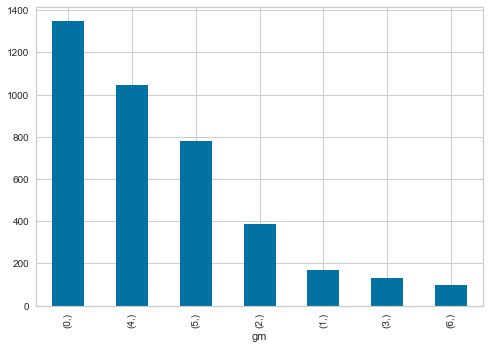

In [70]:
gm_labels.value_counts().plot(kind='bar')

In [71]:
X_GMM = np.append(X, gm_labels, axis=1)
X_GMM_train, X_GMM_test, y_GMM_train, y_GMM_test = train_test_split(X_GMM, Y, test_size=0.2, random_state=42)

In [72]:
gm_train_score, gm_test_score, gm_train_time, gm_test_time = NN(X_GMM_train, X_GMM_test, y_GMM_train.values.ravel(), y_GMM_test.values.ravel())

Training Time: 4207.38818359375
Testing Time: 0.9189453125
Training Time: 3386.035888671875
Testing Time: 0.890869140625
Training Time: 1511.841064453125
Testing Time: 0.855712890625
Training Time: 2474.552001953125
Testing Time: 1.115966796875
Training Time: 1292.419921875
Testing Time: 1.015869140625
Training Time: 2280.04296875
Testing Time: 0.990966796875
Training Time: 1204.232177734375
Testing Time: 1.1240234375
Training Time: 924.868896484375
Testing Time: 1.0947265625
Training Time: 696.14697265625
Testing Time: 1.2080078125
Training Time: 671.906982421875
Testing Time: 1.076904296875


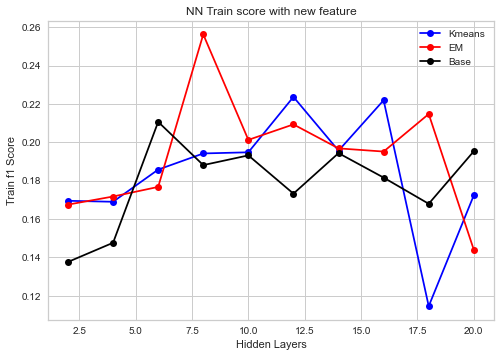

In [73]:
plot_nn_newf("NN Train score with new feature","Train f1 Score",base_train_score,kmeans_train_score,gm_train_score)

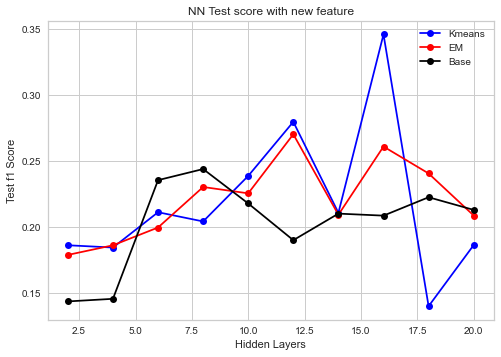

In [74]:
plot_nn_newf("NN Test score with new feature","Test f1 Score",base_test_score,kmeans_test_score,gm_test_score)

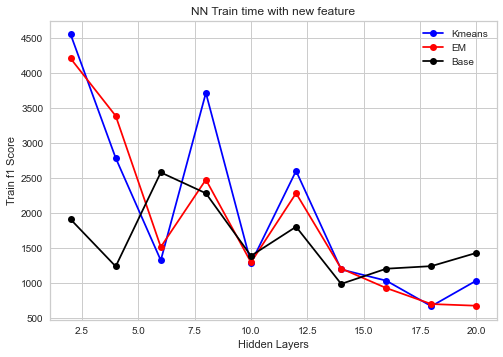

In [75]:
plot_nn_newf("NN Train time with new feature","Train f1 Score",base_train_time,kmeans_train_time,gm_train_time)

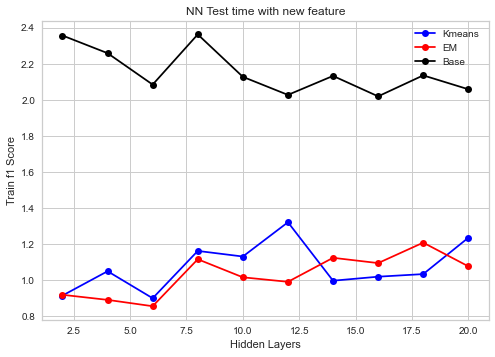

In [76]:
plot_nn_newf("NN Test time with new feature","Train f1 Score",base_test_time,kmeans_test_time,gm_test_time)

## Divorce

In [77]:
X,Y,data_name = divorce()

<AxesSubplot:xlabel='Class'>

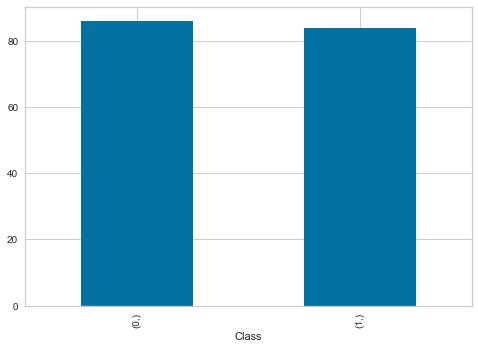

In [78]:
Y.value_counts().plot(kind='bar')

<AxesSubplot:>

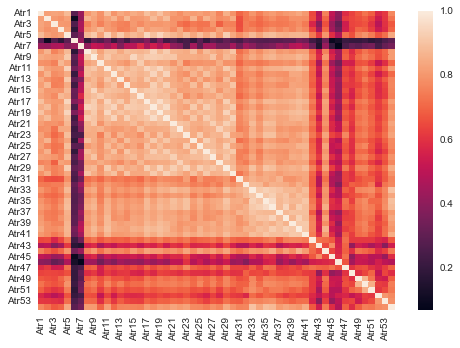

In [79]:
sns.heatmap(X.corr())

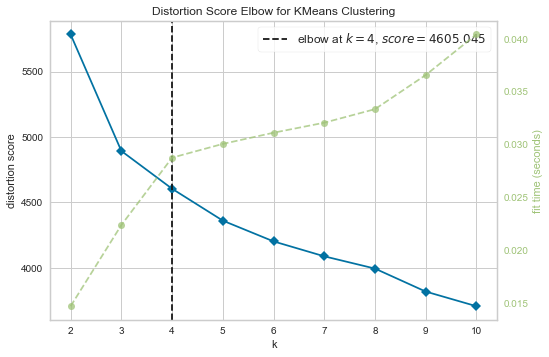

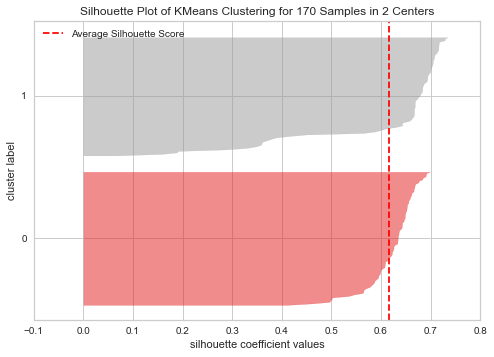

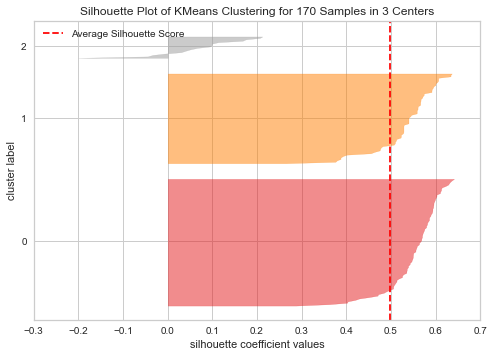

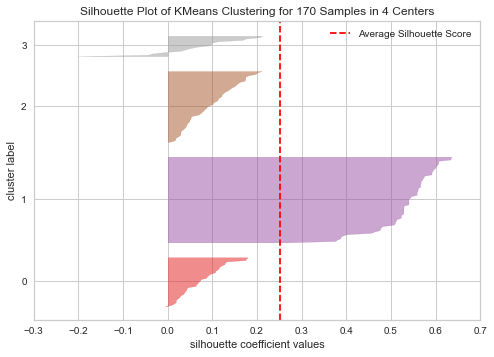

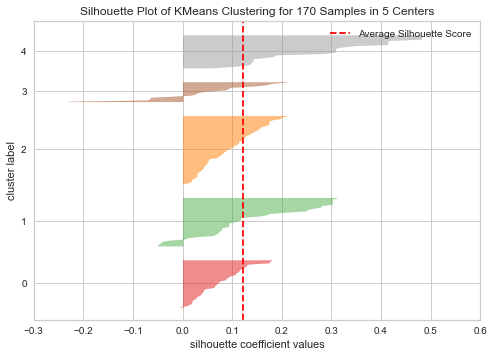

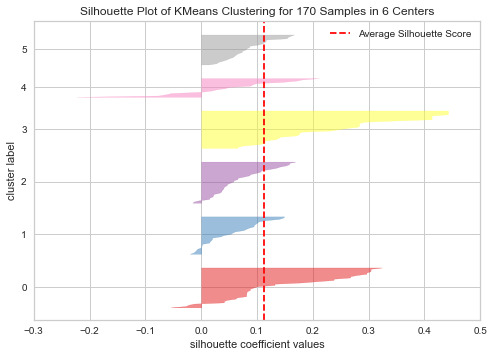

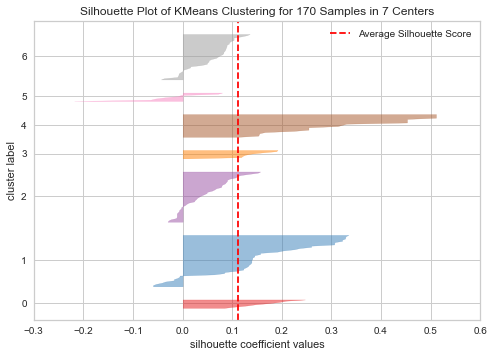

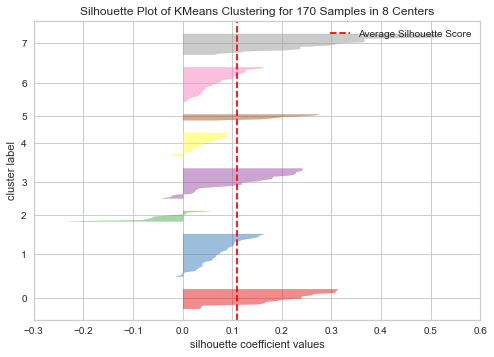

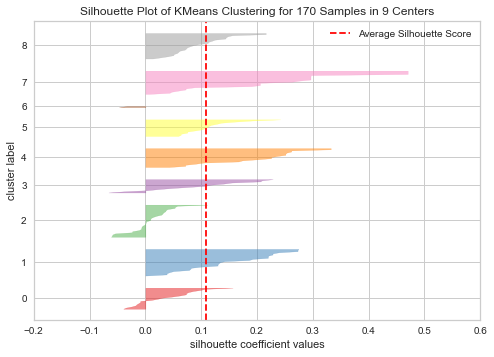

In [80]:
kmeans(X,data_name)

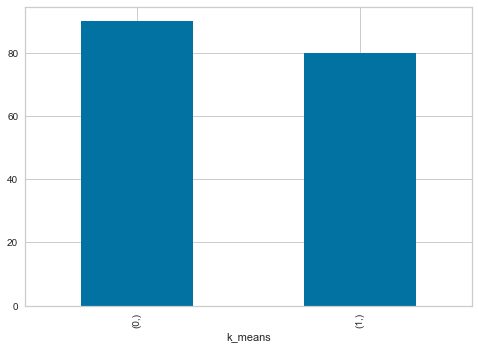

In [81]:
kmeans_bar(X, 2)

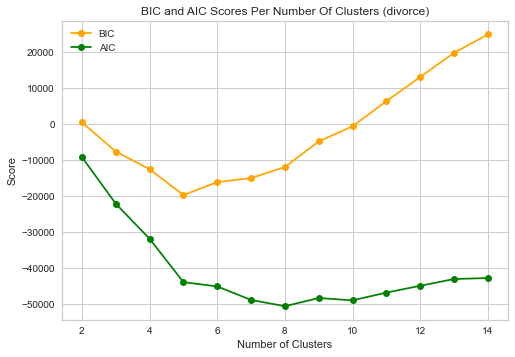

In [82]:
em(X,data_name)

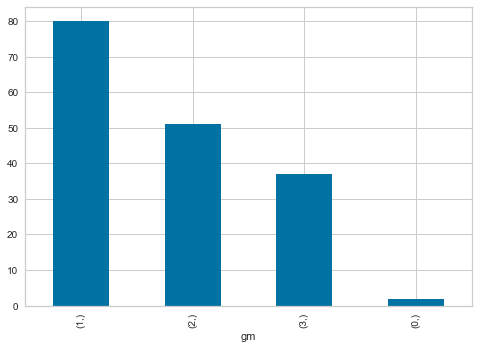

In [83]:
gm_bar(X, 4)

reduction

[ 77.22180992  80.74831461  83.30231009  84.78624776  86.11455612
  87.29942141  88.41983013  89.36419168  90.25868058  91.11632325
  91.86177337  92.55939136  93.17640657  93.72015537  94.22951693
  94.69424632  95.15060958  95.53905693  95.92206109  96.25254012
  96.54870243  96.82418376  97.08074342  97.32309984  97.53515715
  97.7364715   97.93445173  98.11964356  98.2919476   98.45416411
  98.5902166   98.71899207  98.83505099  98.94694933  99.05382958
  99.15361199  99.24630924  99.33174192  99.41353816  99.48743308
  99.5560524   99.61226574  99.66365702  99.71376518  99.75952746
  99.79938446  99.83594633  99.86699841  99.89609528  99.92284195
  99.94547457  99.96647804  99.98527296 100.        ]


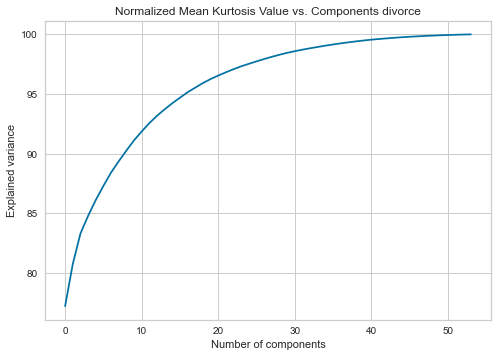

In [84]:
pcaTest(X,data_name)

/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge

53


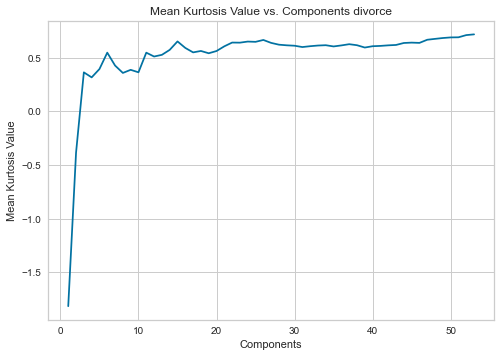

In [85]:
icaTest(X,data_name)

[0.02372200174233926, 0.023040564302396607, 0.02292484626389116, 0.022799482365138183, 0.022754545821116037, 0.022706123021606083, 0.022505928798996502, 0.022254126710989523, 0.021905482988618448, 0.021863349506193275, 0.021741889516352485, 0.021610829653658247, 0.02156705738677702, 0.021500770590963687, 0.0213154997761042, 0.020949818647445925, 0.02088146596746583, 0.020847695590860846, 0.020621003168636687, 0.020513122962846526, 0.020468445406342513, 0.020166840003398353, 0.019973827810746952, 0.0197462925099445, 0.019642355613882518, 0.01901083157889757, 0.018973735312508514, 0.01893796255870701, 0.018853060048963782, 0.017966936958716484, 0.01793321037538292, 0.01779056950192955, 0.017504462900090487, 0.01682842998977024, 0.016698027363576926, 0.01637551029393671, 0.016199114232652766, 0.015927037322810745, 0.015711689898945665, 0.015432887642860724, 0.015360990903287283, 0.015263017016124323, 0.015219894114786707, 0.015139830770111908, 0.014862176528893774, 0.014500636671022034, 0

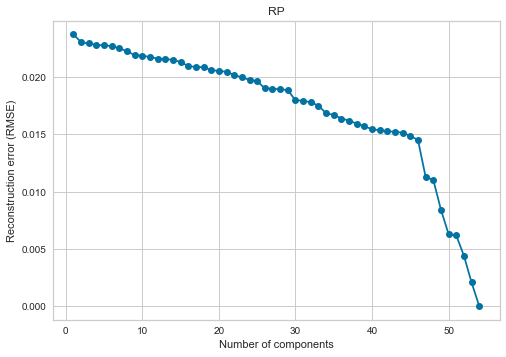

In [86]:
rp(X,data_name)

[100.]


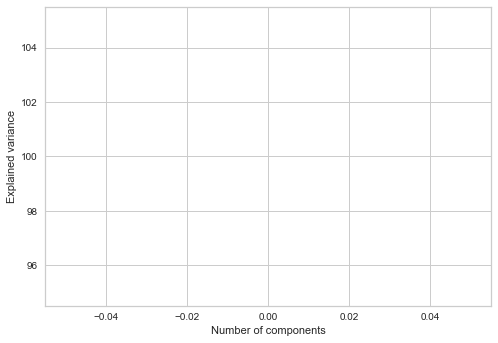

In [87]:
lda(X,Y,data_name)

In [88]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, Y, test_size=0.2, random_state=234)

In [89]:
X_PCA = PCA(n_components = 17).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, Y, test_size=0.2, random_state=234)

In [90]:
X_ICA = FastICA(n_components = 17).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, Y, test_size=0.2, random_state=234)

/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [91]:
X_RP = GaussianRandomProjection(n_components = 4).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, Y, test_size=0.2, random_state=234)

In [92]:
X_LDP = LinearDiscriminantAnalysis(n_components = 1 ,solver= 'eigen').fit_transform(X,Y.values.ravel())
X_LDP_train, X_LDP_test, y_LDP_train, y_LDP_test = train_test_split(X_LDP, Y, test_size=0.2, random_state=234)

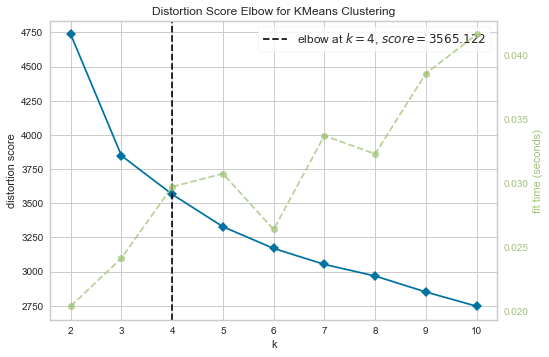

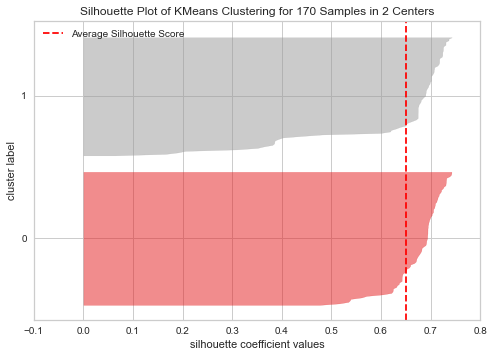

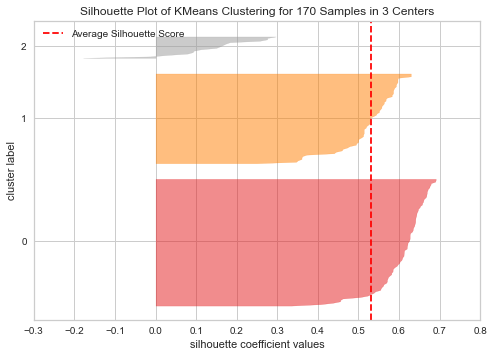

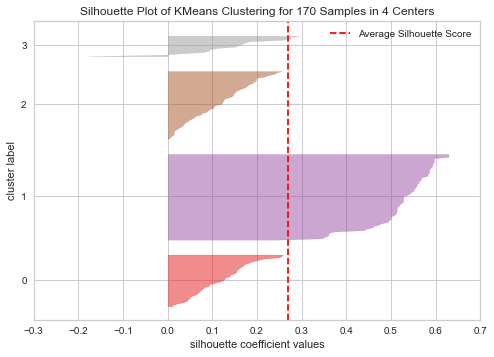

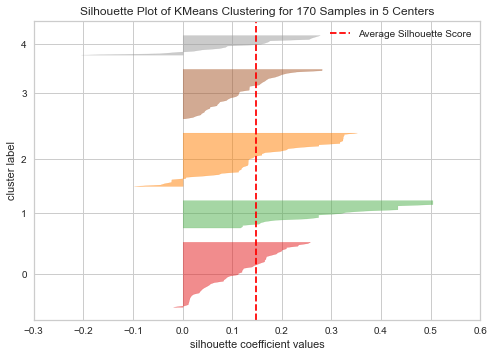

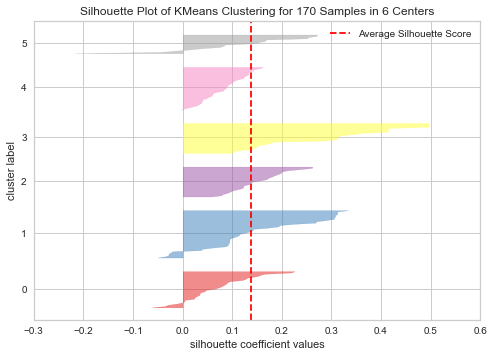

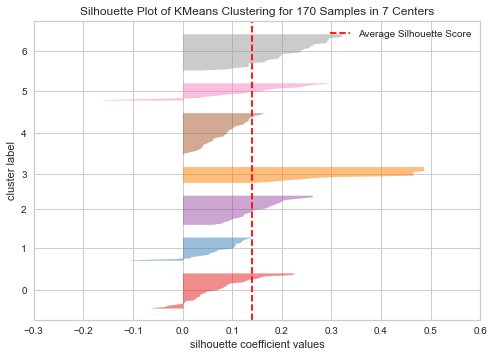

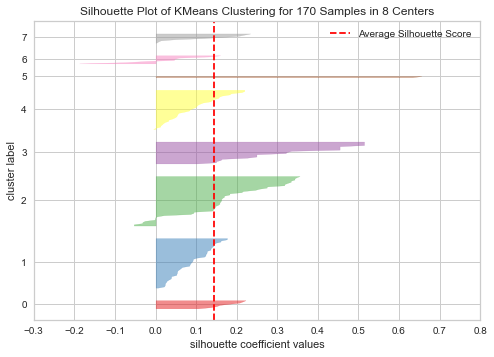

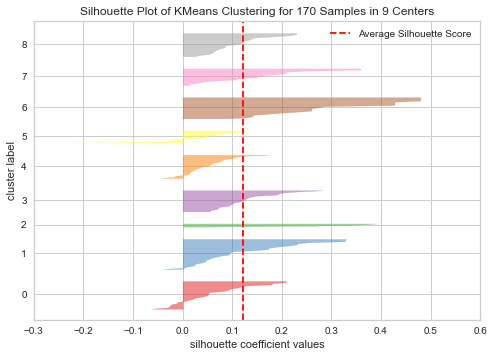

In [93]:
kmeans(X_PCA,data_name)

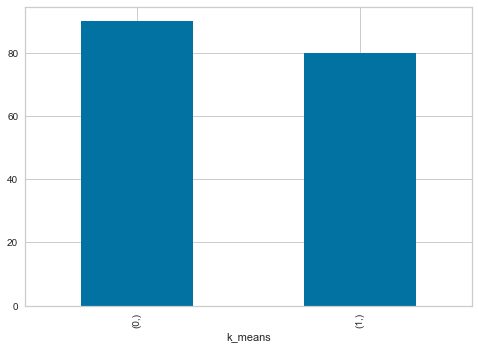

In [94]:
kmeans_bar(X_PCA, 2)

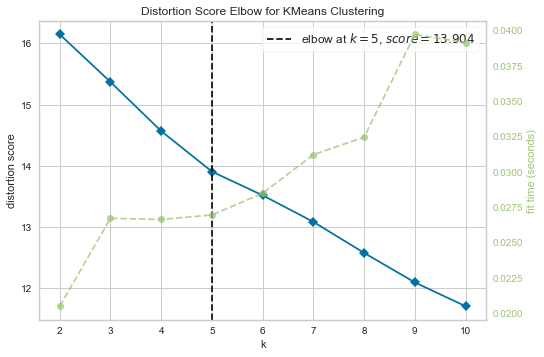

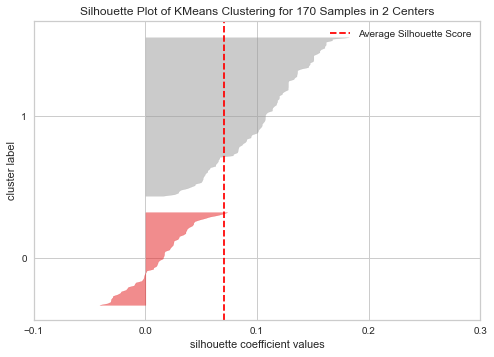

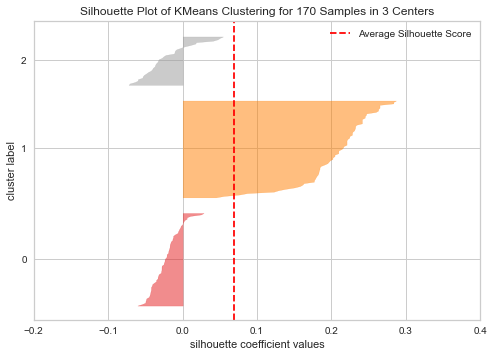

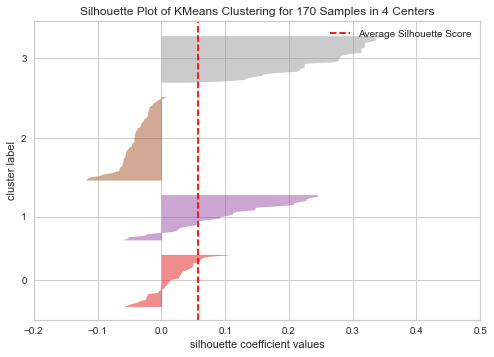

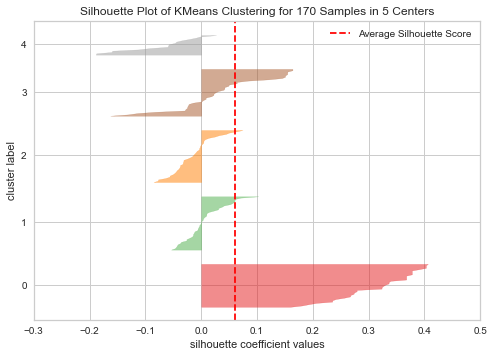

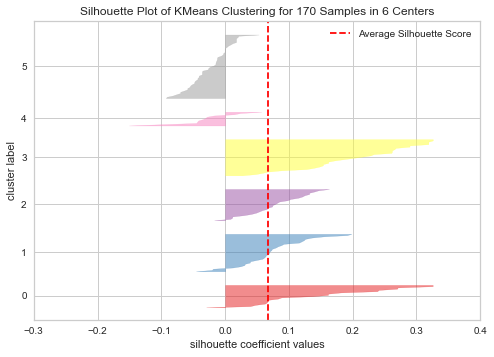

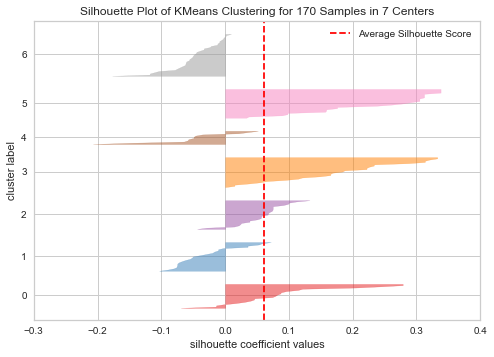

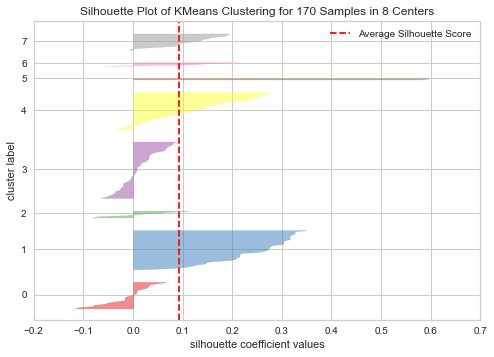

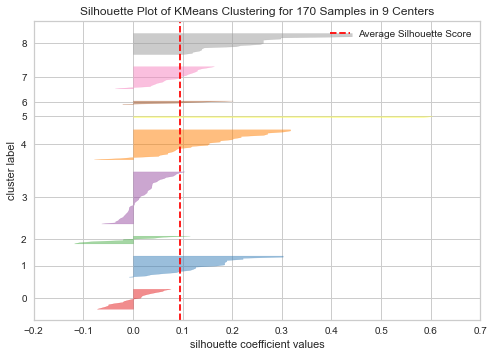

In [95]:
kmeans(X_ICA,data_name)

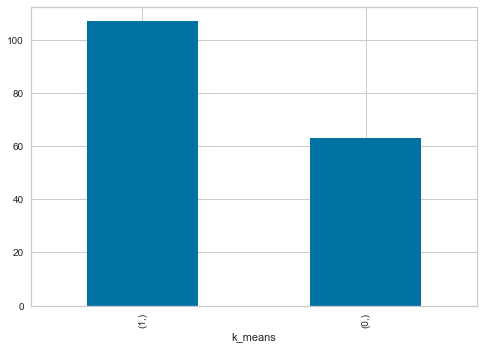

In [96]:
kmeans_bar(X_ICA, 2)

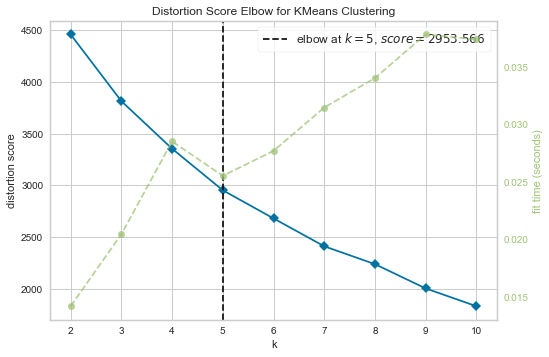

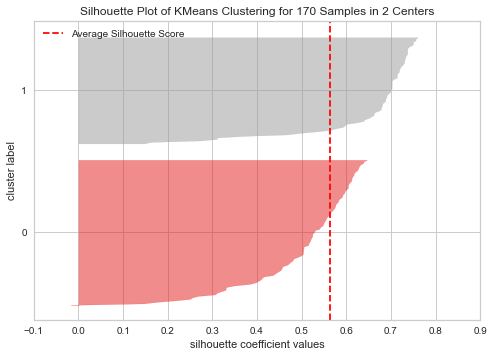

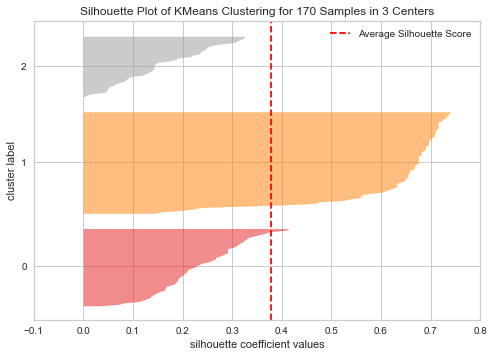

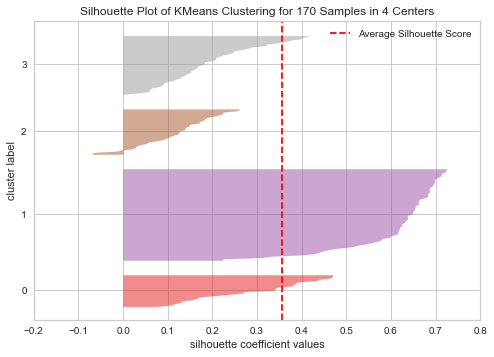

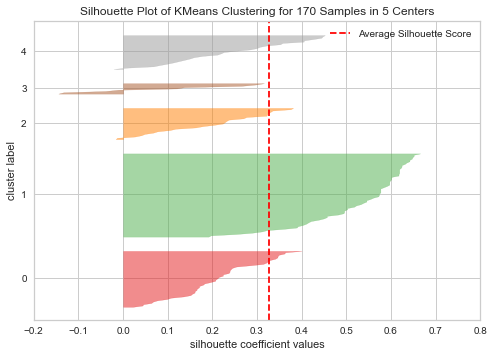

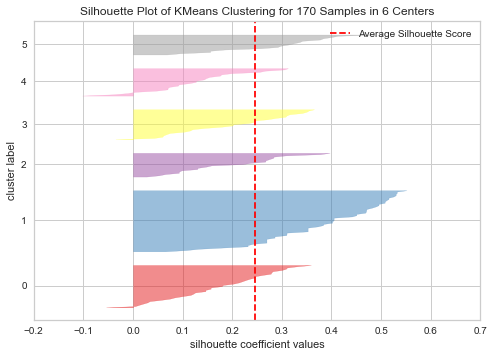

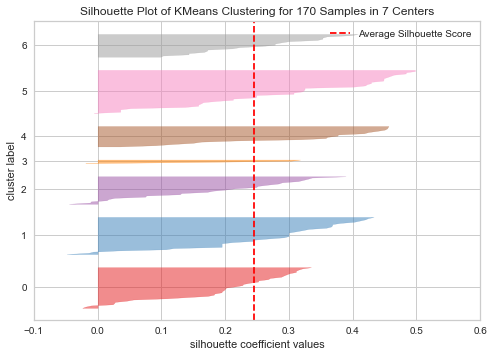

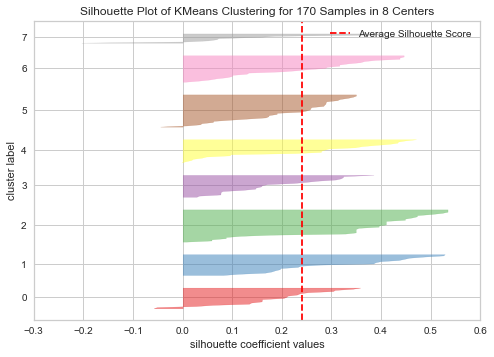

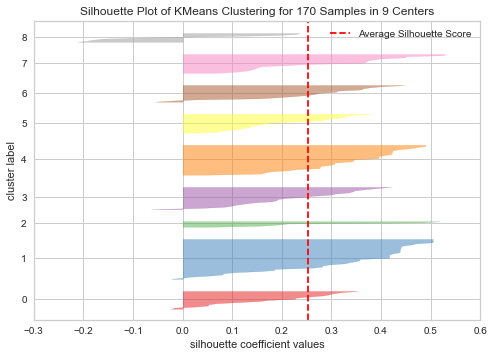

In [97]:
kmeans(X_RP,data_name)

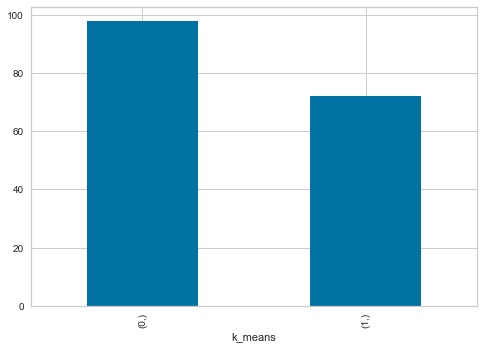

In [98]:
kmeans_bar(X_RP, 2)

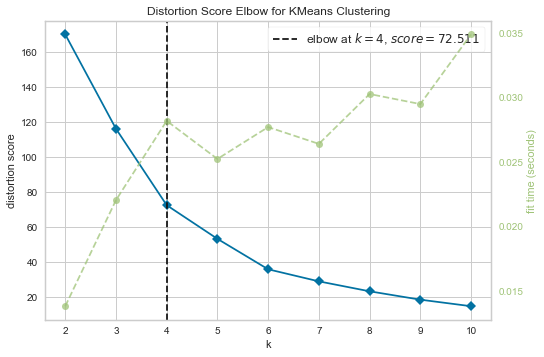

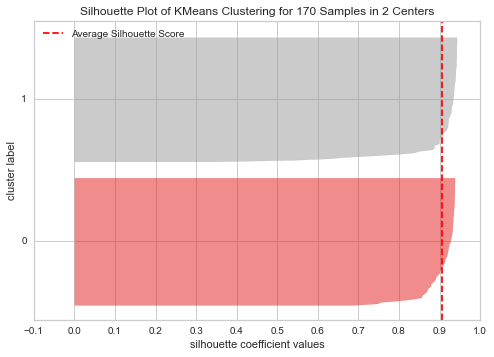

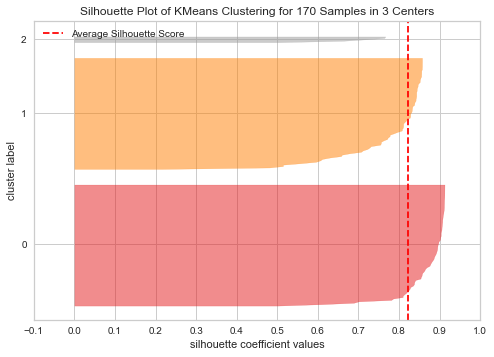

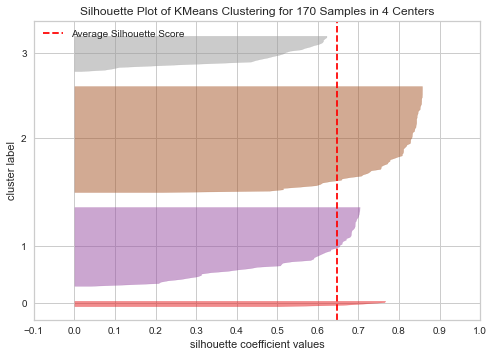

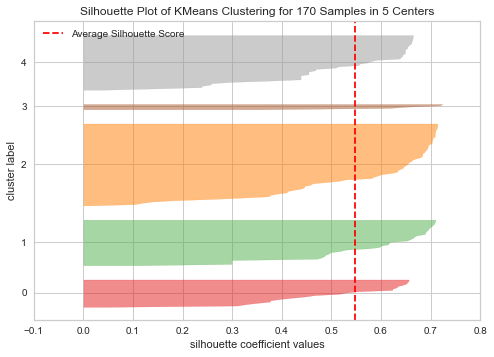

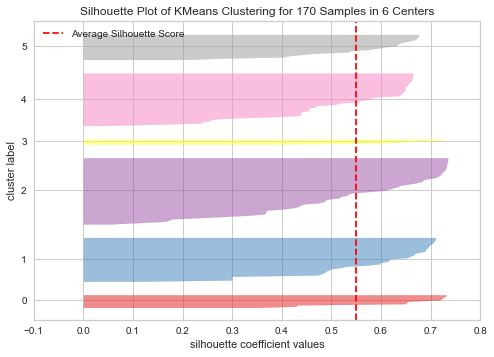

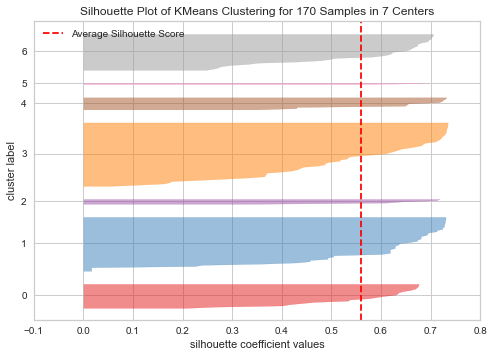

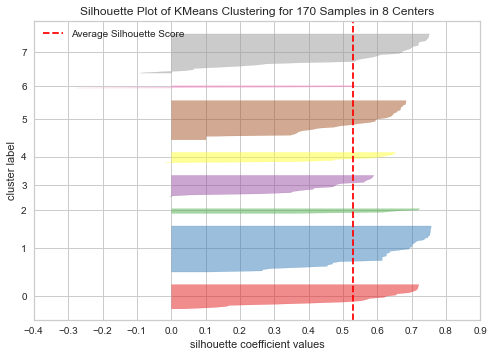

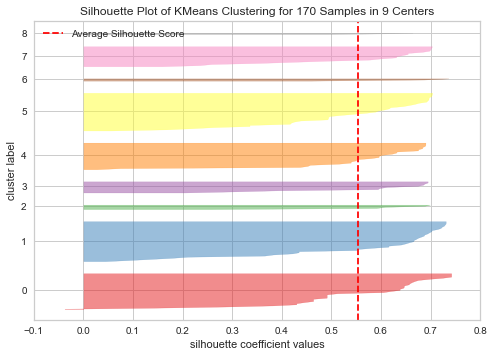

In [99]:
kmeans(X_LDP,data_name)

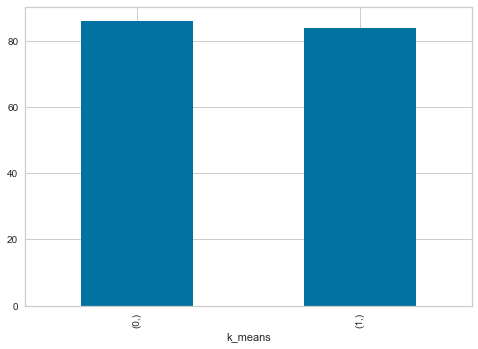

In [100]:
kmeans_bar(X_LDP, 2)

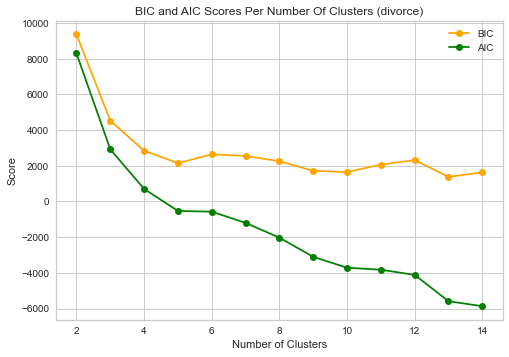

In [101]:
em(X_PCA,data_name)

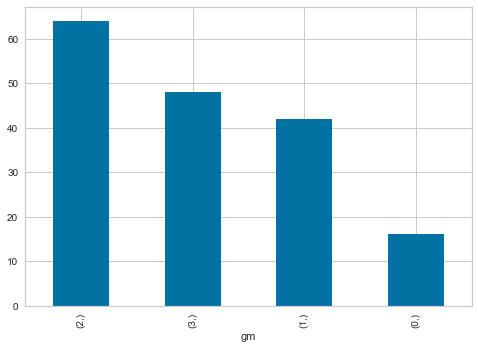

In [102]:
gm_bar(X_PCA, 4)

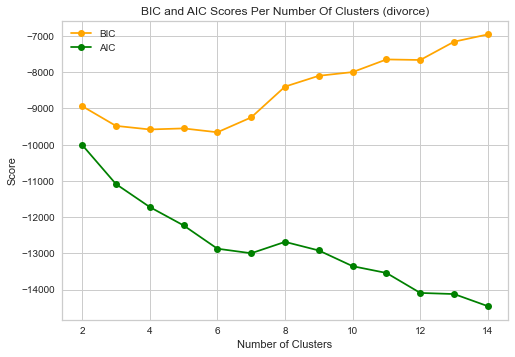

In [103]:
em(X_ICA,data_name)

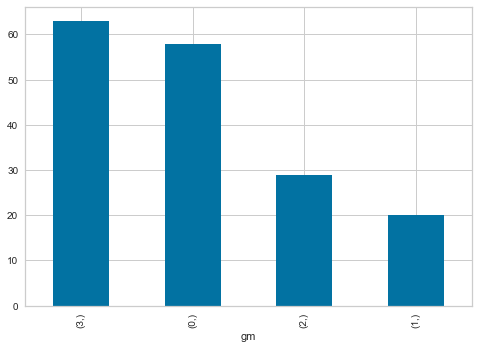

In [104]:
gm_bar(X_ICA, 4)

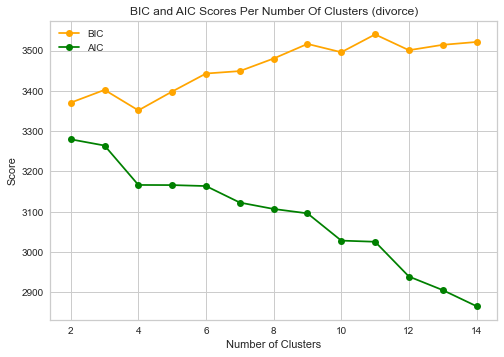

In [105]:
em(X_RP,data_name)

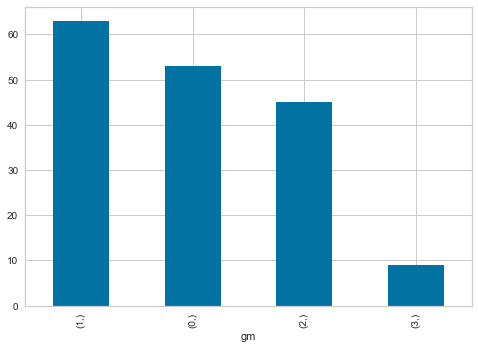

In [106]:
gm_bar(X_RP, 4)

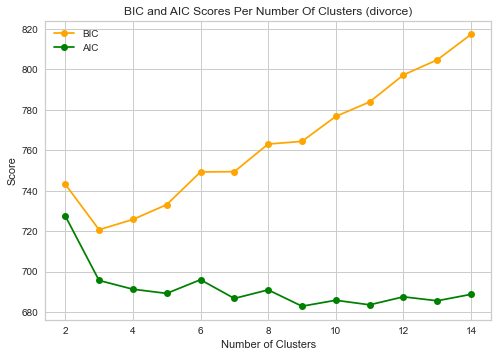

In [107]:
em(X_LDP,data_name)

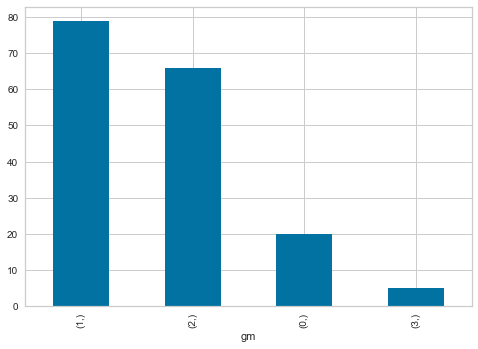

In [108]:
gm_bar(X_LDP, 4)

In [109]:
base_train_score, base_test_score, base_train_time, base_test_time = NN(X_base_train, X_base_test, y_base_train.values.ravel(), y_base_test.values.ravel())

Training Time: 367.052978515625
Testing Time: 2.30810546875
Training Time: 321.162109375
Testing Time: 2.02294921875
Training Time: 192.44482421875
Testing Time: 1.936767578125
Training Time: 215.352783203125
Testing Time: 1.81591796875
Training Time: 172.043212890625
Testing Time: 1.720947265625
Training Time: 242.52294921875
Testing Time: 1.870849609375
Training Time: 128.033935546875
Testing Time: 1.77978515625
Training Time: 175.2080078125
Testing Time: 2.254150390625
Training Time: 109.0322265625
Testing Time: 1.870849609375
Training Time: 146.906982421875
Testing Time: 2.162841796875


In [110]:
pca_train_score, pca_test_score, pca_train_time, pca_test_time = NN(X_PCA_train, X_PCA_test, y_PCA_train.values.ravel(), y_PCA_test.values.ravel())

Training Time: 202.89306640625
Testing Time: 0.726806640625
Training Time: 228.424072265625
Testing Time: 1.920166015625
Training Time: 171.552001953125
Testing Time: 0.912841796875
Training Time: 127.202880859375
Testing Time: 0.603759765625
Training Time: 157.716796875
Testing Time: 1.13671875
Training Time: 175.44091796875
Testing Time: 0.97802734375
Training Time: 147.453857421875
Testing Time: 0.81494140625
Training Time: 152.598876953125
Testing Time: 1.05078125
Training Time: 98.427001953125
Testing Time: 0.89208984375
Training Time: 114.363037109375
Testing Time: 1.034912109375


In [111]:
ica_train_score, ica_test_score, ica_train_time, ica_test_time = NN(X_ICA_train, X_ICA_test, y_ICA_train.values.ravel(), y_ICA_test.values.ravel())

Training Time: 908.631103515625
Testing Time: 0.91015625
Training Time: 796.817138671875
Testing Time: 0.764892578125
Training Time: 743.85498046875
Testing Time: 0.9970703125
Training Time: 803.679931640625
Testing Time: 0.912109375
Training Time: 862.183349609375
Testing Time: 0.76953125
Training Time: 583.16162109375
Testing Time: 0.77587890625
Training Time: 565.43994140625
Testing Time: 1.0908203125
Training Time: 557.47021484375
Testing Time: 0.80908203125
Training Time: 561.763916015625
Testing Time: 0.859375
Training Time: 531.666015625
Testing Time: 0.947998046875


In [112]:
rp_train_score, rp_test_score, rp_train_time, rp_test_time = NN(X_RP_train, X_RP_test, y_RP_train.values.ravel(), y_RP_test.values.ravel())

Training Time: 260.412841796875
Testing Time: 0.688720703125
Training Time: 521.373291015625
Testing Time: 0.8232421875
Training Time: 296.16015625
Testing Time: 0.82080078125
Training Time: 615.2119140625
Testing Time: 0.843994140625
Training Time: 389.35400390625
Testing Time: 0.97216796875
Training Time: 340.22900390625
Testing Time: 0.6669921875
Training Time: 385.188232421875
Testing Time: 1.2578125
Training Time: 377.858154296875
Testing Time: 1.039794921875
Training Time: 321.752197265625
Testing Time: 0.982666015625
Training Time: 321.306884765625
Testing Time: 1.027099609375


In [113]:
ldp_train_score, ldp_test_score, ldp_train_time, ldp_test_time = NN(X_LDP_train, X_LDP_test, y_LDP_train.values.ravel(), y_LDP_test.values.ravel())

Training Time: 604.950927734375
Testing Time: 1.14599609375
Training Time: 435.723876953125
Testing Time: 0.7001953125
Training Time: 350.161865234375
Testing Time: 0.7099609375
Training Time: 321.05322265625
Testing Time: 0.6376953125
Training Time: 313.625244140625
Testing Time: 0.734619140625
Training Time: 471.573974609375
Testing Time: 0.773681640625
Training Time: 221.193115234375
Testing Time: 0.875
Training Time: 236.99169921875
Testing Time: 0.757080078125
Training Time: 205.337158203125
Testing Time: 0.916015625
Training Time: 278.247314453125
Testing Time: 0.959716796875


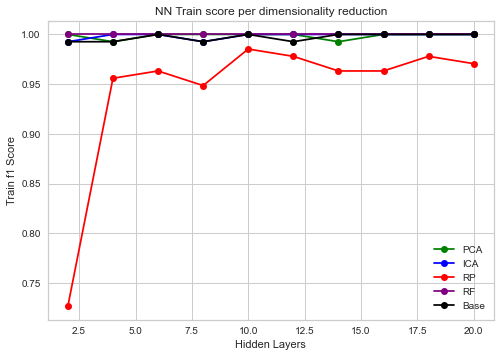

In [114]:
plot_nn("NN Train score per dimensionality reduction","Train f1 Score",base_train_score,pca_train_score,ica_train_score,rp_train_score,ldp_train_score)

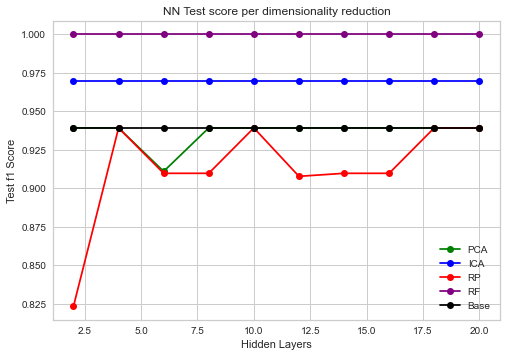

In [115]:
plot_nn("NN Test score per dimensionality reduction","Test f1 Score",base_test_score,pca_test_score,ica_test_score,rp_test_score,ldp_test_score)

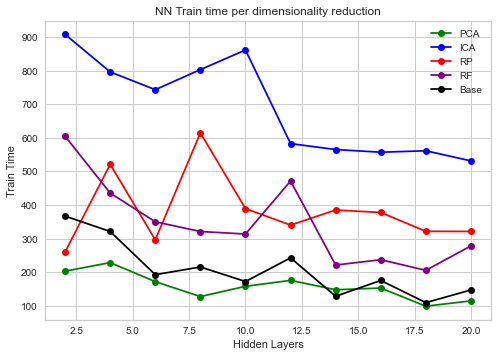

In [116]:
plot_nn("NN Train time per dimensionality reduction","Train Time",base_train_time,pca_train_time,ica_train_time,rp_train_time,ldp_train_time)

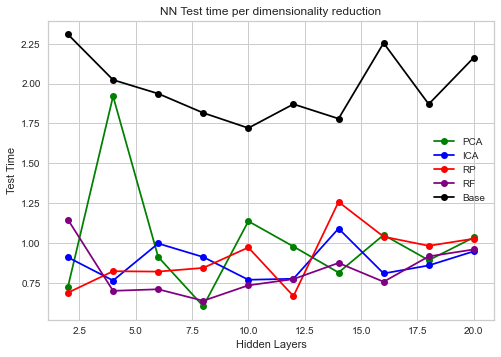

In [117]:
plot_nn("NN Test time per dimensionality reduction","Test Time",base_test_time ,pca_test_time,ica_test_time,rp_test_time,ldp_test_time)

In [118]:
k_means_clustering = KMeans(n_clusters=2,random_state=234).fit(X)

In [119]:
k_means_clustering.predict(X)
kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])

<AxesSubplot:xlabel='k_means'>

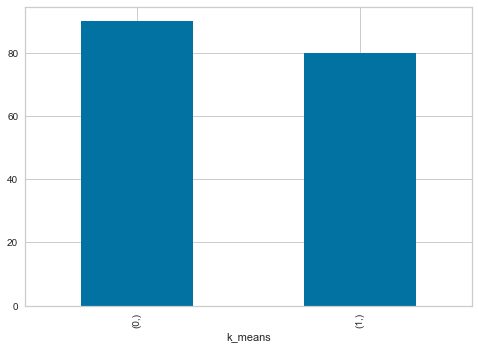

In [120]:
kmeans_labels.value_counts().plot(kind='bar')

In [121]:
gm = GaussianMixture(n_components=4, covariance_type='full')
gm.fit(X)

GaussianMixture(n_components=4)

In [122]:
gm.predict(X)
gm_labels = pd.DataFrame(data = gm.predict(X), columns=['gmm'])

<AxesSubplot:xlabel='gmm'>

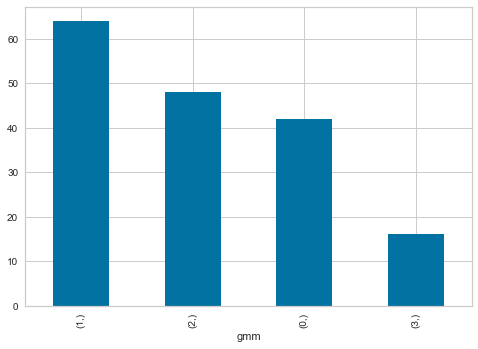

In [123]:
gm_labels.value_counts().plot(kind='bar')